# Описание проекта
Я - маркетинговый аналитик развлекательного приложения Procrastinate Pro+. Несколько прошлых месяцев ваш бизнес постоянно нес убытки - в привлечение пользователей была вложена куча денег, а толку никакого. Вам нужно разобраться в причинах этой ситуации.

У нас в распоряжении есть лог сервера с данными о посещениях приложения новыми пользователями, зарегистрировавшимися в период с 2019-05-01 по 2019-10-27, выгрузка их покупок за этот период, а также статистика рекламных расходов. Необходимо изучить, как люди пользуются продуктом, когда они начинают покупать, сколько денег приносит каждый клиент, когда он окупается и какие факторы отричательно влияют на привлечение пользователей.
 
Проект состоит из пяти частей:
1. задать функции для расчета и анализа LTV, ROI, удержания и конверсии
2. провести исследовательский анализ данных

Построим профили пользователей. Определим минимальную и максимальную дату привлечения пользователей.

- Из каких стран приходят посетители? Какие страны дают больше всего платящих пользователей?
- Какими устройствами они пользуются? С каких устройств чаще всего заходят платящие пользователи?
- По каким рекламным каналам шло привлечение пользователей? Какие каналы приносят больше всего платящих пользователей?.

3.  Маркетинг

- Сколько денег потратили? Всего / на каждый источник / по времени
- Сколько в среднем стоило привлечение одного покупателя из каждого источника?

4. Оценим окупаемость рекламы для привлечения пользователей

С помощью LTV и ROI:
- Проанализируем общую окупаемость рекламы;
- Проанализируем окупаемость рекламы с разбивкой по устройствам;
- Проанализируем окупаемость рекламы с разбивкой по странам;
- Проанализируем окупаемость рекламы с разбивкой по рекламным каналам.

Опишем проблемы, которые мы обнаружили. Ответим на вопросы:
- Окупается ли реклама, направленная на привлечение пользователей в целом? 
- Какие устройства, страны и рекламные каналы могут оказывать негативное влияние на окупаемость рекламы?
- Чем могут быть вызваны проблемы окупаемости? Изучите конверсию и удержание с разбивкой по устройствам, странам, рекламным каналам.

Опишем возможные причины обнаруженных проблем и сформируем рекомендации для рекламного отдела. 

6. Выводы
- Выделим причины неэффективности привлечения пользователей;
- Сформируем рекомендации для отдела маркетинга для повышения эффективности.

**Описание данных**

Таблица visits_log_short (лог сервера с информацией о посещениях сайта):

    User Id — уникальный идентификатор пользователя
    Device — категория устройства пользователя
    Session start — дата и время начала сессии
    Session End — дата и время окончания сессии
    Channel — идентификатор рекламного источника, из которого пришел пользователь
    Region - страна пользователя

Таблица orders_log_short (информация о заказах):

    User Id — уникальный id пользователя, который сделал заказ
    Event Dt — дата и время покупки
    Revenue — выручка

Таблица costs_short (информация о затратах на маркетинг):

    Channel — идентификатор рекламного источника
    Dt — дата
    Costs — затраты на этот рекламный источник в этот день

## Изучение данных из файла и предобработка

### Загружаем данные

In [3]:
#импортируем библиотеки
from matplotlib import pyplot as plt
from datetime import datetime, timedelta
import numpy as np
import pandas as pd

In [4]:
#cчитываем таблицы в переменные
visits = pd.read_csv('visits_info_short.csv')
orders = pd.read_csv('orders_info_short.csv')
costs = pd.read_csv('costs_info_short.csv')

In [5]:
#смотрим, что находится в таблицах
visits.info()
visits.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 309901 entries, 0 to 309900
Data columns (total 6 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   User Id        309901 non-null  int64 
 1   Region         309901 non-null  object
 2   Device         309901 non-null  object
 3   Channel        309901 non-null  object
 4   Session Start  309901 non-null  object
 5   Session End    309901 non-null  object
dtypes: int64(1), object(5)
memory usage: 14.2+ MB


,User Id,Region,Device,Channel,Session Start,Session End
0,981449118918,United States,iPhone,organic,2019-05-01 02:36:01,2019-05-01 02:45:01
1,278965908054,United States,iPhone,organic,2019-05-01 04:46:31,2019-05-01 04:47:35
2,590706206550,United States,Mac,organic,2019-05-01 14:09:25,2019-05-01 15:32:08
3,326433527971,United States,Android,TipTop,2019-05-01 00:29:59,2019-05-01 00:54:25
4,349773784594,United States,Mac,organic,2019-05-01 03:33:35,2019-05-01 03:57:40


In [6]:
orders.info()
orders.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40212 entries, 0 to 40211
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   User Id   40212 non-null  int64  
 1   Event Dt  40212 non-null  object 
 2   Revenue   40212 non-null  float64
dtypes: float64(1), int64(1), object(1)
memory usage: 942.6+ KB


,User Id,Event Dt,Revenue
0,188246423999,2019-05-01 23:09:52,4.99
1,174361394180,2019-05-01 12:24:04,4.99
2,529610067795,2019-05-01 11:34:04,4.99
3,319939546352,2019-05-01 15:34:40,4.99
4,366000285810,2019-05-01 13:59:51,4.99


In [7]:
costs.info()
costs.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1800 entries, 0 to 1799
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   dt       1800 non-null   object 
 1   Channel  1800 non-null   object 
 2   costs    1800 non-null   float64
dtypes: float64(1), object(2)
memory usage: 42.3+ KB


,dt,Channel,costs
0,2019-05-01,FaceBoom,113.3
1,2019-05-02,FaceBoom,78.1
2,2019-05-03,FaceBoom,85.8
3,2019-05-04,FaceBoom,136.4
4,2019-05-05,FaceBoom,122.1


### Предобработка данных
У нас три таблицы. Надо провести предобработку данных: привести все к нижнему регистру, заменить данные и переименовать столбцы, найти и удалить дубликаты и изменить тип данных с датой.

In [8]:
#переименуем название столбцов и преведем к нижнему регистру
visits.columns = visits.columns.str.lower().str.replace(' ', '_')
orders.columns = orders.columns.str.lower().str.replace(' ', '_')
costs.columns = costs.columns.str.lower().str.replace(' ', '_')

In [9]:
#приведем данные в таблицах к нижнему регистру
visits['region'] = visits['region'].str.lower()
visits['device'] = visits['device'].str.lower()
visits['channel'] = visits['channel'].str.lower()
costs['channel'] = costs['channel'].str.lower()

In [10]:
#проверим на  явные дубликаты
visits.duplicated().sum(), orders.duplicated().sum(), costs.duplicated().sum()

(0, 0, 0)

In [11]:
#проверим на неявные дубликаты
display(visits['region'].value_counts())
display(visits['device'].value_counts())
display(visits['channel'].value_counts())
display(costs['channel'].value_counts())

united states    207327
uk                36419
france            35396
germany           30759
Name: region, dtype: int64

iphone     112603
android     72590
pc          62686
mac         62022
Name: device, dtype: int64

organic               107760
tiptop                 54794
faceboom               49022
wahoonetbanner         20465
leapbob                17013
opplecreativemedia     16794
rocketsuperads         12724
yrabbit                 9053
mediatornado            8878
adnonsense              6891
lambdamediaads          6507
Name: channel, dtype: int64

faceboom              180
mediatornado          180
rocketsuperads        180
tiptop                180
yrabbit               180
adnonsense            180
leapbob               180
opplecreativemedia    180
wahoonetbanner        180
lambdamediaads        180
Name: channel, dtype: int64

In [12]:
#заменим 'united states' на 'us'
visits['region'] = visits['region'].replace('united states', 'us')

Пропусков и дубликатов у нас нет.

В каждой таблице в столбцах с датами надо привести к типу datetime

In [13]:
#приводим данные с датами к типу datetime
visits['session_start'] = pd.to_datetime(visits['session_start'])
visits['session_end'] = pd.to_datetime(visits['session_end'])
orders['event_dt'] = pd.to_datetime(orders['event_dt'])
costs['dt'] = pd.to_datetime(costs['dt']).dt.date


### Вывод
Мы имеем три таблицы с данными. Пропусков и дубликатов у нас нет. Все данные привели единому виду для удобства работы. Данные с датами привели к типу datetime.

## Функции для расчета и анализа LTV, ROI, удержания и конверсии

### Функция для создания пользовательских профилей

In [14]:
# функция для создания пользовательских профилей

def get_profiles(sessions, orders, ad_costs):

    # находим параметры первых посещений
    profiles = (
        sessions.sort_values(by=['user_id', 'session_start'])
        .groupby('user_id')
        .agg(
            {
                'session_start': 'first',
                'channel': 'first',
                'device': 'first',
                'region': 'first',
            }
        )
        .rename(columns={'session_start': 'first_ts'})
        .reset_index()
    )

    # для когортного анализа определяем дату первого посещения
    # и первый день месяца, в который это посещение произошло
    profiles['dt'] = profiles['first_ts'].dt.date
    profiles['month'] = profiles['first_ts'].astype('datetime64[M]')

    # добавляем признак платящих пользователей
    profiles['payer'] = profiles['user_id'].isin(orders['user_id'].unique())

    # считаем количество уникальных пользователей
    # с одинаковыми источником и датой привлечения
    new_users = (
        profiles.groupby(['dt', 'channel'])
        .agg({'user_id': 'nunique'})
        .rename(columns={'user_id': 'unique_users'})
        .reset_index()
    )

    # объединяем траты на рекламу и число привлечённых пользователей
    ad_costs = ad_costs.merge(new_users, on=['dt', 'channel'], how='left')

    # делим рекламные расходы на число привлечённых пользователей
    ad_costs['acquisition_cost'] = ad_costs['costs'] / ad_costs['unique_users']

    # добавляем стоимость привлечения в профили
    profiles = profiles.merge(
        ad_costs[['dt', 'channel', 'acquisition_cost']],
        on=['dt', 'channel'],
        how='left',
    )

    # стоимость привлечения органических пользователей равна нулю
    profiles['acquisition_cost'] = profiles['acquisition_cost'].fillna(0)

    return profiles

### Функция для расчёта удержания

In [15]:
# функция для расчёта удержания

def get_retention(
    profiles,
    sessions,
    observation_date,
    horizon_days,
    dimensions=[],
    ignore_horizon=False,
):

    # добавляем столбец payer в передаваемый dimensions список
    dimensions = ['payer'] + dimensions

    # исключаем пользователей, не «доживших» до горизонта анализа
    last_suitable_acquisition_date = observation_date
    if not ignore_horizon:
        last_suitable_acquisition_date = observation_date - timedelta(
            days=horizon_days - 1
        )
    result_raw = profiles.query('dt <= @last_suitable_acquisition_date')

    # собираем «сырые» данные для расчёта удержания
    result_raw = result_raw.merge(
        sessions[['user_id', 'session_start']], on='user_id', how='left'
    )
    result_raw['lifetime'] = (
        result_raw['session_start'] - result_raw['first_ts']
    ).dt.days

    # функция для группировки таблицы по желаемым признакам
    def group_by_dimensions(df, dims, horizon_days):
        result = df.pivot_table(
            index=dims, columns='lifetime', values='user_id', aggfunc='nunique'
        )
        cohort_sizes = (
            df.groupby(dims)
            .agg({'user_id': 'nunique'})
            .rename(columns={'user_id': 'cohort_size'})
        )
        result = cohort_sizes.merge(result, on=dims, how='left').fillna(0)
        result = result.div(result['cohort_size'], axis=0)
        result = result[['cohort_size'] + list(range(horizon_days))]
        result['cohort_size'] = cohort_sizes
        return result

    # получаем таблицу удержания
    result_grouped = group_by_dimensions(result_raw, dimensions, horizon_days)

    # получаем таблицу динамики удержания
    result_in_time = group_by_dimensions(
        result_raw, dimensions + ['dt'], horizon_days
    )

    # возвращаем обе таблицы и сырые данные
    return result_raw, result_grouped, result_in_time

### Функция для визуализации удержания

In [16]:
# функция для визуализации удержания

def plot_retention(retention, retention_history, horizon, window=7):

    # задаём размер сетки для графиков
    plt.figure(figsize=(15, 10))

    # исключаем размеры когорт и удержание первого дня
    retention = retention.drop(columns=['cohort_size', 0])
    # в таблице динамики оставляем только нужный лайфтайм
    retention_history = retention_history.drop(columns=['cohort_size'])[
        [horizon - 1]
    ]

    # если в индексах таблицы удержания только payer,
    # добавляем второй признак — cohort
    if retention.index.nlevels == 1:
        retention['cohort'] = 'All users'
        retention = retention.reset_index().set_index(['cohort', 'payer'])

    # в таблице графиков — два столбца и две строки, четыре ячейки
    # в первой строим кривые удержания платящих пользователей
    ax1 = plt.subplot(2, 2, 1)
    retention.query('payer == True').droplevel('payer').T.plot(
        grid=True, ax=ax1
    )
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('Удержание платящих пользователей')

    # во второй ячейке строим кривые удержания неплатящих
    # вертикальная ось — от графика из первой ячейки
    ax2 = plt.subplot(2, 2, 2, sharey=ax1)
    retention.query('payer == False').droplevel('payer').T.plot(
        grid=True, ax=ax2
    )
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('Удержание неплатящих пользователей')

    # в третьей ячейке — динамика удержания платящих
    ax3 = plt.subplot(2, 2, 3)
    # получаем названия столбцов для сводной таблицы
    columns = [
        name
        for name in retention_history.index.names
        if name not in ['dt', 'payer']
    ]
    # фильтруем данные и строим график
    filtered_data = retention_history.query('payer == True').pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax3)
    plt.xlabel('Дата привлечения')
    plt.title(
        'Динамика удержания платящих пользователей на {}-й день'.format(
            horizon
        )
    )

    # в чётвертой ячейке — динамика удержания неплатящих
    ax4 = plt.subplot(2, 2, 4, sharey=ax3)
    # фильтруем данные и строим график
    filtered_data = retention_history.query('payer == False').pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax4)
    plt.xlabel('Дата привлечения')
    plt.title(
        'Динамика удержания неплатящих пользователей на {}-й день'.format(
            horizon
        )
    )
    
    plt.tight_layout()
    plt.show() 

### Функция для расчёта конверсии

In [17]:
# функция для расчёта конверсии

def get_conversion(
    profiles,
    purchases,
    observation_date,
    horizon_days,
    dimensions=[],
    ignore_horizon=False,
):

    # исключаем пользователей, не «доживших» до горизонта анализа
    last_suitable_acquisition_date = observation_date
    if not ignore_horizon:
        last_suitable_acquisition_date = observation_date - timedelta(
            days=horizon_days - 1
        )
    result_raw = profiles.query('dt <= @last_suitable_acquisition_date')

    # определяем дату и время первой покупки для каждого пользователя
    first_purchases = (
        purchases.sort_values(by=['user_id', 'event_dt'])
        .groupby('user_id')
        .agg({'event_dt': 'first'})
        .reset_index()
    )

    # добавляем данные о покупках в профили
    result_raw = result_raw.merge(
        first_purchases[['user_id', 'event_dt']], on='user_id', how='left'
    )

    # рассчитываем лайфтайм для каждой покупки
    result_raw['lifetime'] = (
        result_raw['event_dt'] - result_raw['first_ts']
    ).dt.days

    # группируем по cohort, если в dimensions ничего нет
    if len(dimensions) == 0:
        result_raw['cohort'] = 'All users' 
        dimensions = dimensions + ['cohort']

    # функция для группировки таблицы по желаемым признакам
    def group_by_dimensions(df, dims, horizon_days):
        result = df.pivot_table(
            index=dims, columns='lifetime', values='user_id', aggfunc='nunique'
        )
        result = result.fillna(0).cumsum(axis = 1)
        cohort_sizes = (
            df.groupby(dims)
            .agg({'user_id': 'nunique'})
            .rename(columns={'user_id': 'cohort_size'})
        )
        result = cohort_sizes.merge(result, on=dims, how='left').fillna(0)
        # делим каждую «ячейку» в строке на размер когорты
        # и получаем conversion rate
        result = result.div(result['cohort_size'], axis=0)
        result = result[['cohort_size'] + list(range(horizon_days))]
        result['cohort_size'] = cohort_sizes
        return result

    # получаем таблицу конверсии
    result_grouped = group_by_dimensions(result_raw, dimensions, horizon_days)

    # для таблицы динамики конверсии убираем 'cohort' из dimensions
    if 'cohort' in dimensions: 
        dimensions = []

    # получаем таблицу динамики конверсии
    result_in_time = group_by_dimensions(
        result_raw, dimensions + ['dt'], horizon_days
    )

    # возвращаем обе таблицы и сырые данные
    return result_raw, result_grouped, result_in_time 

### Функция для визуализации конверсии

In [18]:
# функция для визуализации конверсии

def plot_conversion(conversion, conversion_history, horizon, window=7):

    # задаём размер сетки для графиков
    plt.figure(figsize=(15, 5))

    # исключаем размеры когорт
    conversion = conversion.drop(columns=['cohort_size'])
    # в таблице динамики оставляем только нужный лайфтайм
    conversion_history = conversion_history.drop(columns=['cohort_size'])[
        [horizon - 1]
    ]

    # первый график — кривые конверсии
    ax1 = plt.subplot(1, 2, 1)
    conversion.T.plot(grid=True, ax=ax1)
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('Конверсия пользователей')

    # второй график — динамика конверсии
    ax2 = plt.subplot(1, 2, 2, sharey=ax1)
    columns = [
        # столбцами сводной таблицы станут все столбцы индекса, кроме даты
        name for name in conversion_history.index.names if name not in ['dt']
    ]
    filtered_data = conversion_history.pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax2)
    plt.xlabel('Дата привлечения')
    plt.title('Динамика конверсии пользователей на {}-й день'.format(horizon))

    plt.tight_layout()
    plt.show() 

### Функция для расчёта LTV и ROI

In [19]:
def get_ltv(
    profiles,
    purchases,
    observation_date,
    horizon_days,
    dimensions=[],
    ignore_horizon=False,
):

    # исключаем пользователей, не «доживших» до горизонта анализа
    last_suitable_acquisition_date = observation_date
    if not ignore_horizon:
        last_suitable_acquisition_date = observation_date - timedelta(
            days=horizon_days - 1
        )
    result_raw = profiles.query('dt <= @last_suitable_acquisition_date')
    # добавляем данные о покупках в профили
    result_raw = result_raw.merge(
        purchases[['user_id', 'event_dt', 'revenue']], on='user_id', how='left'
    )
    # рассчитываем лайфтайм пользователя для каждой покупки
    result_raw['lifetime'] = (
        result_raw['event_dt'] - result_raw['first_ts']
    ).dt.days
    # группируем по cohort, если в dimensions ничего нет
    if len(dimensions) == 0:
        result_raw['cohort'] = 'All users'
        dimensions = dimensions + ['cohort']

    # функция группировки по желаемым признакам
    def group_by_dimensions(df, dims, horizon_days):
        # строим «треугольную» таблицу выручки
        result = df.pivot_table(
            index=dims, columns='lifetime', values='revenue', aggfunc='sum'
        )
        # находим сумму выручки с накоплением
        result = result.fillna(0).cumsum(axis=1)
        # вычисляем размеры когорт
        cohort_sizes = (
            df.groupby(dims)
            .agg({'user_id': 'nunique'})
            .rename(columns={'user_id': 'cohort_size'})
        )
        # объединяем размеры когорт и таблицу выручки
        result = cohort_sizes.merge(result, on=dims, how='left').fillna(0)
        # считаем LTV: делим каждую «ячейку» в строке на размер когорты
        result = result.div(result['cohort_size'], axis=0)
        # исключаем все лайфтаймы, превышающие горизонт анализа
        result = result[['cohort_size'] + list(range(horizon_days))]
        # восстанавливаем размеры когорт
        result['cohort_size'] = cohort_sizes

        # собираем датафрейм с данными пользователей и значениями CAC, 
        # добавляя параметры из dimensions
        cac = df[['user_id', 'acquisition_cost'] + dims].drop_duplicates()

        # считаем средний CAC по параметрам из dimensions
        cac = (
            cac.groupby(dims)
            .agg({'acquisition_cost': 'mean'})
            .rename(columns={'acquisition_cost': 'cac'})
        )

        # считаем ROI: делим LTV на CAC
        roi = result.div(cac['cac'], axis=0)

        # удаляем строки с бесконечным ROI
        roi = roi[~roi['cohort_size'].isin([np.inf])]

        # восстанавливаем размеры когорт в таблице ROI
        roi['cohort_size'] = cohort_sizes

        # добавляем CAC в таблицу ROI
        roi['cac'] = cac['cac']

        # в финальной таблице оставляем размеры когорт, CAC
        # и ROI в лайфтаймы, не превышающие горизонт анализа
        roi = roi[['cohort_size', 'cac'] + list(range(horizon_days))]

        # возвращаем таблицы LTV и ROI
        return result, roi

    # получаем таблицы LTV и ROI
    result_grouped, roi_grouped = group_by_dimensions(
        result_raw, dimensions, horizon_days
    )

    # для таблиц динамики убираем 'cohort' из dimensions
    if 'cohort' in dimensions:
        dimensions = []

    # получаем таблицы динамики LTV и ROI
    result_in_time, roi_in_time = group_by_dimensions(
        result_raw, dimensions + ['dt'], horizon_days
    )

    return (
        result_raw,  # сырые данные
        result_grouped,  # таблица LTV
        result_in_time,  # таблица динамики LTV
        roi_grouped,  # таблица ROI
        roi_in_time,  # таблица динамики ROI
    ) 

### Функция для визуализации LTV и ROI

In [20]:
# функция для визуализации LTV и ROI
def plot_ltv_roi(ltv, ltv_history, roi, roi_history, horizon, window=7):

    plt.figure(figsize=(30, 20))

    ltv = ltv.drop(columns=['cohort_size'])
    ltv_history = ltv_history.drop(columns=['cohort_size'])[[horizon - 1]]
    cac_history = roi_history[['cac']]
    roi = roi.drop(columns=['cohort_size', 'cac'])
    roi_history = roi_history.drop(columns=['cohort_size', 'cac'])[
        [horizon - 1]
    ]

    # первый график — кривые ltv
    ax1 = plt.subplot(2, 3, 1)
    ltv.T.plot(grid=True, ax=ax1)
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('LTV')

    # второй график — динамика ltv
    ax2 = plt.subplot(2, 3, 2, sharey=ax1)
    columns = [name for name in ltv_history.index.names if name not in ['dt']]
    filtered_data = ltv_history.pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax2)
    plt.xlabel('Дата привлечения')
    plt.title('Динамика LTV пользователей на {}-й день'.format(horizon))

    # третий график — динамика cac
    ax3 = plt.subplot(2, 3, 3, sharey=ax1)
    columns = [name for name in cac_history.index.names if name not in ['dt']]
    filtered_data = cac_history.pivot_table(
        index='dt', columns=columns, values='cac', aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax3)
    plt.xlabel('Дата привлечения')
    plt.title('Динамика стоимости привлечения пользователей')

    # четвёртый график — кривые roi
    ax4 = plt.subplot(2, 3, 4)
    roi.T.plot(grid=True, ax=ax4)
    plt.axhline(y=1, color='red', linestyle='--', label='Уровень окупаемости')
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('ROI')

    # пятый график — динамика roi
    ax5 = plt.subplot(2, 3, 5, sharey=ax4)
    columns = [name for name in roi_history.index.names if name not in ['dt']]
    filtered_data = roi_history.pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax5)
    plt.axhline(y=1, color='red', linestyle='--', label='Уровень окупаемости')
    plt.xlabel('Дата привлечения')
    plt.title('Динамика ROI пользователей на {}-й день'.format(horizon))

    plt.tight_layout()
    plt.show()

### Функция для сглаживания фрейма

In [21]:
# функция для сглаживания фрейма

def filter_data(df, window):
    # для каждого столбца применяем скользящее среднее
    for column in df.columns.values:
        df[column] = df[column].rolling(window).mean() 
    return df 

### Вывод
Мы ввели все функции, которые будут необходимы для последующей работы.

## Исследовательский анализ данных

- Из каких стран приходят посетители? Какие страны дают больше всего платящих пользователей?
- Какими устройствами они пользуются? С каких устройств чаще всего заходят платящие пользователи?
- По каким рекламным каналам шло привлечение пользователей? Какие каналы приносят больше всего платящих пользователей?

### Профили пользователей

In [22]:
#получим полные профили пользователей
profiles = get_profiles(visits, orders, costs)
profiles

,user_id,first_ts,channel,device,region,dt,month,payer,acquisition_cost
0,599326,2019-05-07 20:58:57,faceboom,mac,us,2019-05-07,2019-05-01,True,1.088172
1,4919697,2019-07-09 12:46:07,faceboom,iphone,us,2019-07-09,2019-07-01,False,1.107237
2,6085896,2019-10-01 09:58:33,organic,iphone,france,2019-10-01,2019-10-01,False,0.000000
3,22593348,2019-08-22 21:35:48,adnonsense,pc,germany,2019-08-22,2019-08-01,False,0.988235
4,31989216,2019-10-02 00:07:44,yrabbit,iphone,us,2019-10-02,2019-10-01,False,0.230769
...,...,...,...,...,...,...,...,...,...
150003,999956196527,2019-09-28 08:33:02,tiptop,iphone,us,2019-09-28,2019-09-01,False,3.500000
150004,999975439887,2019-10-21 00:35:17,organic,pc,uk,2019-10-21,2019-10-01,False,0.000000
150005,999976332130,2019-07-23 02:57:06,tiptop,iphone,us,2019-07-23,2019-07-01,False,2.600000
150006,999979924135,2019-09-28 21:28:09,mediatornado,pc,us,2019-09-28,2019-09-01,False,0.205714


In [23]:
#найдем минимальную и максимальную дату привлечения пользователей
min_analysis_date = profiles['dt'].min()
max_analysis_date = profiles['dt'].max()
min_analysis_date

datetime.date(2019, 5, 1)

In [24]:
max_analysis_date

datetime.date(2019, 10, 27)

### Разбивка по странам

In [25]:
#найдем откуда приходят пользователи и откуда большая часть платящих пользователей
region = profiles.groupby('region').agg({'user_id' : 'count','payer' : 'sum'}).sort_values('user_id', ascending = False)
region['% платящих'] = region['payer'] / region['user_id'] *100
region['% платящих'] = np.round(region['% платящих'], 2)
region = region.rename(columns={'user_id' : 'Пользователи', 'payer' : 'Плятащие пользователи'})
region

,Пользователи,Плятащие пользователи,% платящих
region,,,
us,100002,6902,6.90
uk,17575,700,3.98
france,17450,663,3.80
germany,14981,616,4.11


### Разбивка по устройствам

In [26]:
#найдем какие устройства используют пользователи
device = profiles.groupby('device').agg({'user_id' : 'count','payer' : 'sum'}).sort_values('user_id', ascending = False)
device['% платящих'] = device['payer'] / device['user_id'] *100
device['% платящих'] = np.round(device['% платящих'], 2)
device = device.rename(columns={'user_id' : 'Пользователи', 'payer' : 'Плятащие пользователи'})
device

,Пользователи,Плятащие пользователи,% платящих
device,,,
iphone,54479,3382,6.21
android,35032,2050,5.85
pc,30455,1537,5.05
mac,30042,1912,6.36


### Разбивка по рекламным каналам

In [27]:
#найдем через какие каналы проводят пользователей и какой больше всего
channel = profiles.groupby('channel').agg({'user_id' : 'count','payer' : 'sum'}).sort_values('user_id', ascending = False)
channel['% платящих'] = channel['payer'] / channel['user_id'] *100
channel['% платящих'] = np.round(channel['% платящих'], 2)
channel = channel.rename(columns={'user_id' : 'Пользователи', 'payer' : 'Плятащие пользователи'})
channel

,Пользователи,Плятащие пользователи,% платящих
channel,,,
organic,56439,1160,2.06
faceboom,29144,3557,12.20
tiptop,19561,1878,9.60
opplecreativemedia,8605,233,2.71
leapbob,8553,262,3.06
wahoonetbanner,8553,453,5.30
rocketsuperads,4448,352,7.91
mediatornado,4364,156,3.57
yrabbit,4312,165,3.83


### Вывод

Нашли минимальную и максимальную дату привлечения, 1 мая 2019 и 27 октября 2019, соответвенно.

Большая часть платящих пользователей из Штатов. После по убыванию Германия, Англия и Франция.

Большая часть плятих пользоваелй использует маки. После по убыванию айфон, андройд и пк на виндоус.

Фейсбус приносит большую часть плятящих пользователей. После него идет эднонсенс. Органическая аудитория имеет самый меньший процент платящих пользователей.

## Маркетинг

- Сколько денег потратили? Всего / на каждый источник / по времени
- Сколько в среднем стоило привлечение одного покупателя из каждого источника?

### Расходы на рекламу

In [28]:
#посчитаем общую сумму расходов на маркетинг
np.round(costs['costs'].sum(), 2)

105497.3

In [29]:
#узнаем как траты, распределенны по источникам
costs.groupby('channel').agg({'costs' : 'sum'}).sort_values('costs', ascending = False)

,costs
channel,
tiptop,54751.30
faceboom,32445.60
wahoonetbanner,5151.00
adnonsense,3911.25
opplecreativemedia,2151.25
rocketsuperads,1833.00
leapbob,1797.60
lambdamediaads,1557.60
mediatornado,954.48


In [30]:
costs

,dt,channel,costs
0,2019-05-01,faceboom,113.3
1,2019-05-02,faceboom,78.1
2,2019-05-03,faceboom,85.8
3,2019-05-04,faceboom,136.4
4,2019-05-05,faceboom,122.1
...,...,...,...
1795,2019-10-23,lambdamediaads,4.0
1796,2019-10-24,lambdamediaads,6.4
1797,2019-10-25,lambdamediaads,8.8
1798,2019-10-26,lambdamediaads,8.8


In [31]:
#добавим строку с месяцем
costs['mn'] = pd.to_datetime(costs['dt']).dt.month

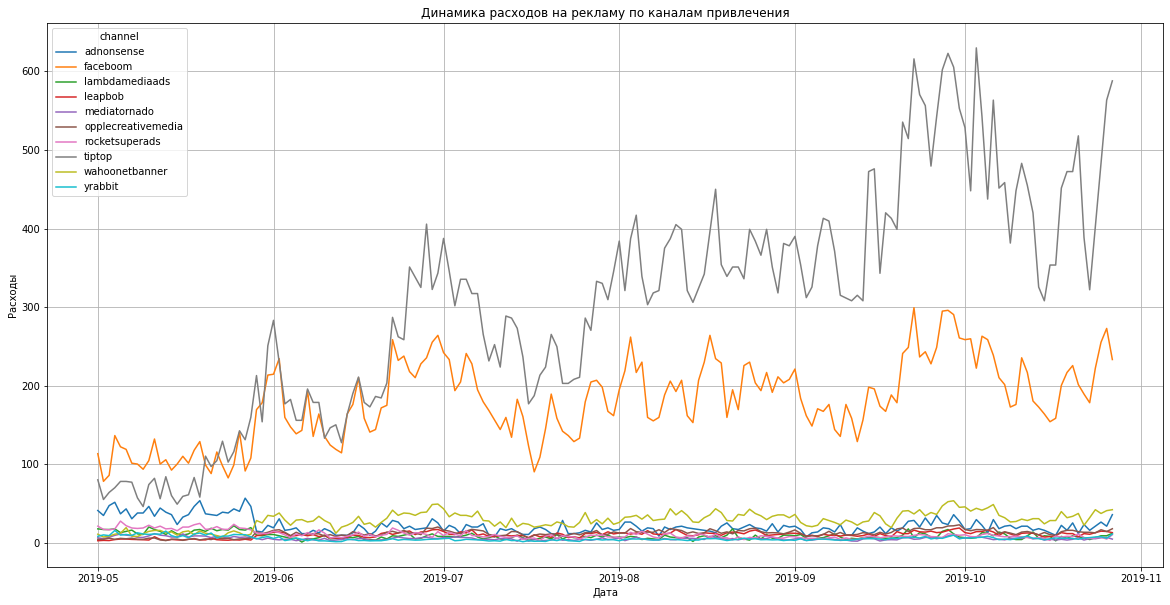

In [32]:
#постороим график измений бюджета во времени
report = (
   costs
    .reset_index()
    .pivot_table(index='dt', columns='channel', values='costs', aggfunc='mean')
)
report.plot(
    grid=True,figsize = (20,10))
plt.ylabel('Расходы')
plt.xlabel('Дата')
plt.title('Динамика расходов на рекламу по каналам привлечения')
plt.show()

In [33]:
report.info

<bound method DataFrame.info of channel     adnonsense  faceboom  lambdamediaads  leapbob  mediatornado  \
dt                                                                        
2019-05-01       40.95     113.3            17.6     2.52          6.24   
2019-05-02       34.65      78.1            16.8     2.94          5.04   
2019-05-03       47.25      85.8            16.8     2.73          6.96   
2019-05-04       51.45     136.4            17.6     3.99          9.36   
2019-05-05       36.75     122.1            12.8     4.62         11.04   
...                ...       ...             ...      ...           ...   
2019-10-23       15.75     178.2             4.0    10.71          5.28   
2019-10-24       21.00     222.2             6.4    12.81          5.04   
2019-10-25       26.25     255.2             8.8    14.70          6.24   
2019-10-26       21.00     272.8             8.8    14.28          6.72   
2019-10-27       35.70     233.2            12.0    12.81          4

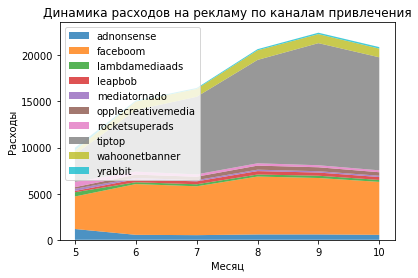

In [34]:
report = (
   costs
    .reset_index()
    .pivot_table(index='mn', columns='channel', values='costs', aggfunc='sum')
)
fig, ax = plt.subplots()
ax.stackplot(report.index, report.values.T,
             labels=report.keys(), alpha=0.8)
ax.legend(loc='upper left')
ax.set_title('Динамика расходов на рекламу по каналам привлечения')
ax.set_xlabel('Месяц')
ax.set_ylabel('Расходы')

plt.show()

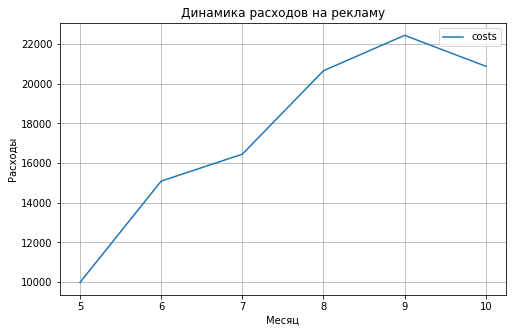

In [35]:
report = (
   costs
    .reset_index()
    .pivot_table(index='mn', values='costs', aggfunc='sum')
)
report.plot(
    grid=True,figsize = (8,5))
plt.ylabel('Расходы')
plt.xlabel('Месяц')
plt.title('Динамика расходов на рекламу')
plt.show()

### САС

In [36]:
#узнаем средний сас для пользователей из разных каналов привлечения
profiles.groupby('channel').agg({'acquisition_cost' : 'mean'}).sort_values('acquisition_cost', ascending = False).style.format({'acquisition_cost': '{:.2}'})

,acquisition_cost
channel,
tiptop,2.8
faceboom,1.1
adnonsense,1.0
lambdamediaads,0.72
wahoonetbanner,0.6
rocketsuperads,0.41
opplecreativemedia,0.25
yrabbit,0.22
mediatornado,0.22


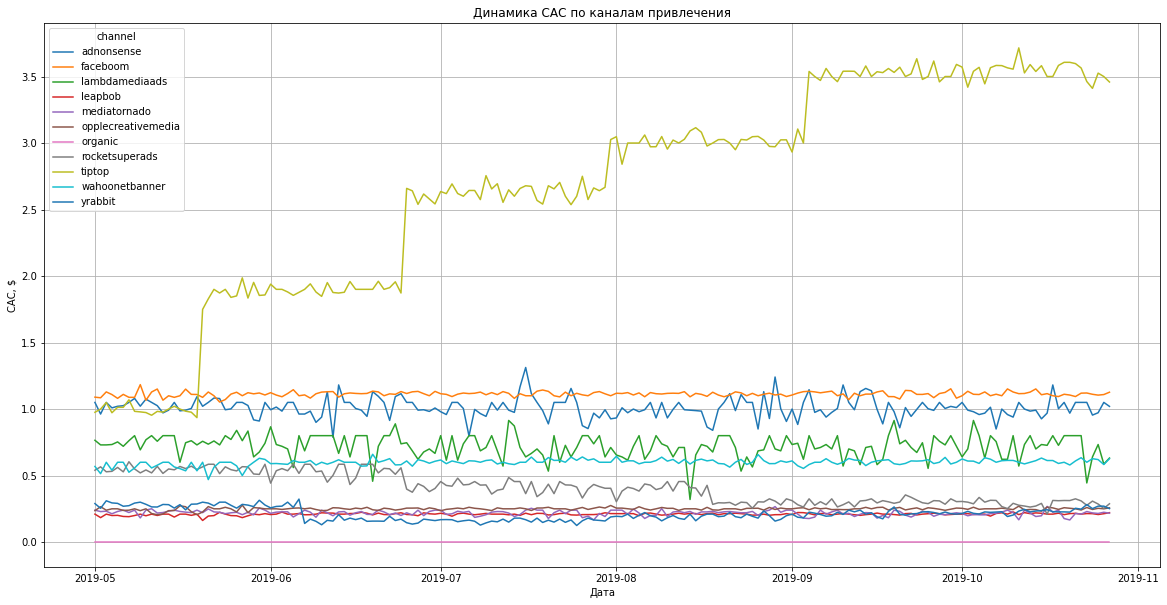

In [37]:
#постороим график измений сас во времени
profiles = get_profiles(visits, orders, costs)
report = (
   profiles
    .reset_index()
    .pivot_table(index='dt', columns='channel', values='acquisition_cost', aggfunc='mean')
)
report.plot(
    grid=True,figsize = (20,10))
plt.ylabel('САС, $')
plt.xlabel('Дата')
plt.title('Динамика САС по каналам привлечения')
plt.show()

In [38]:
#посчитаем общий сас по всему проекту
np.round(profiles['acquisition_cost'].mean(), 2)

0.7

### Вывод
Всего потратили на рекламу 10549 у.е. Из них больше половина на типтоп 55000 у.е. После него по бюджету идет фейсбум 32 у.е.

До середины июня бюджет типтоп и фейсбум был равен, но после типтоп стал отрываться. Бюджет фейсбума также продолжил рост.

САС типтоп сильно выше всех отстальных каналов и постоянно растет. Фейсбум здесь показал очень стабильный результат.

## Окупаемость рекламы для привлечения пользователей

С помощью LTV и ROI:
- Проанализируем общую окупаемость рекламы;
- Проанализируем окупаемость рекламы с разбивкой по устройствам;
- Проанализируем окупаемость рекламы с разбивкой по странам;
- Проанализируем окупаемость рекламы с разбивкой по рекламным каналам.

Опишем проблемы, которые мы обнаружили. Ответим на вопросы:
- Окупается ли реклама, направленная на привлечение пользователей в целом? 
- Какие устройства, страны и рекламные каналы могут оказывать негативное влияние на окупаемость рекламы?
- Чем могут быть вызваны проблемы окупаемости? Изучите конверсию и удержание с разбивкой по устройствам, странам, рекламным каналам.

Опишем возможные причины обнаруженных проблем и сформируем рекомендации для рекламного отдела. 

### Общая окупаемость рекламы

In [39]:
#исключим органический трафик из нашего датафрейма
profiles = get_profiles(visits, orders, costs)
profiles = profiles.query('channel != "organic"') 

In [40]:
#зададим начальные параметры
observation_date = datetime(2019, 11, 1).date()
horizon_days = 14

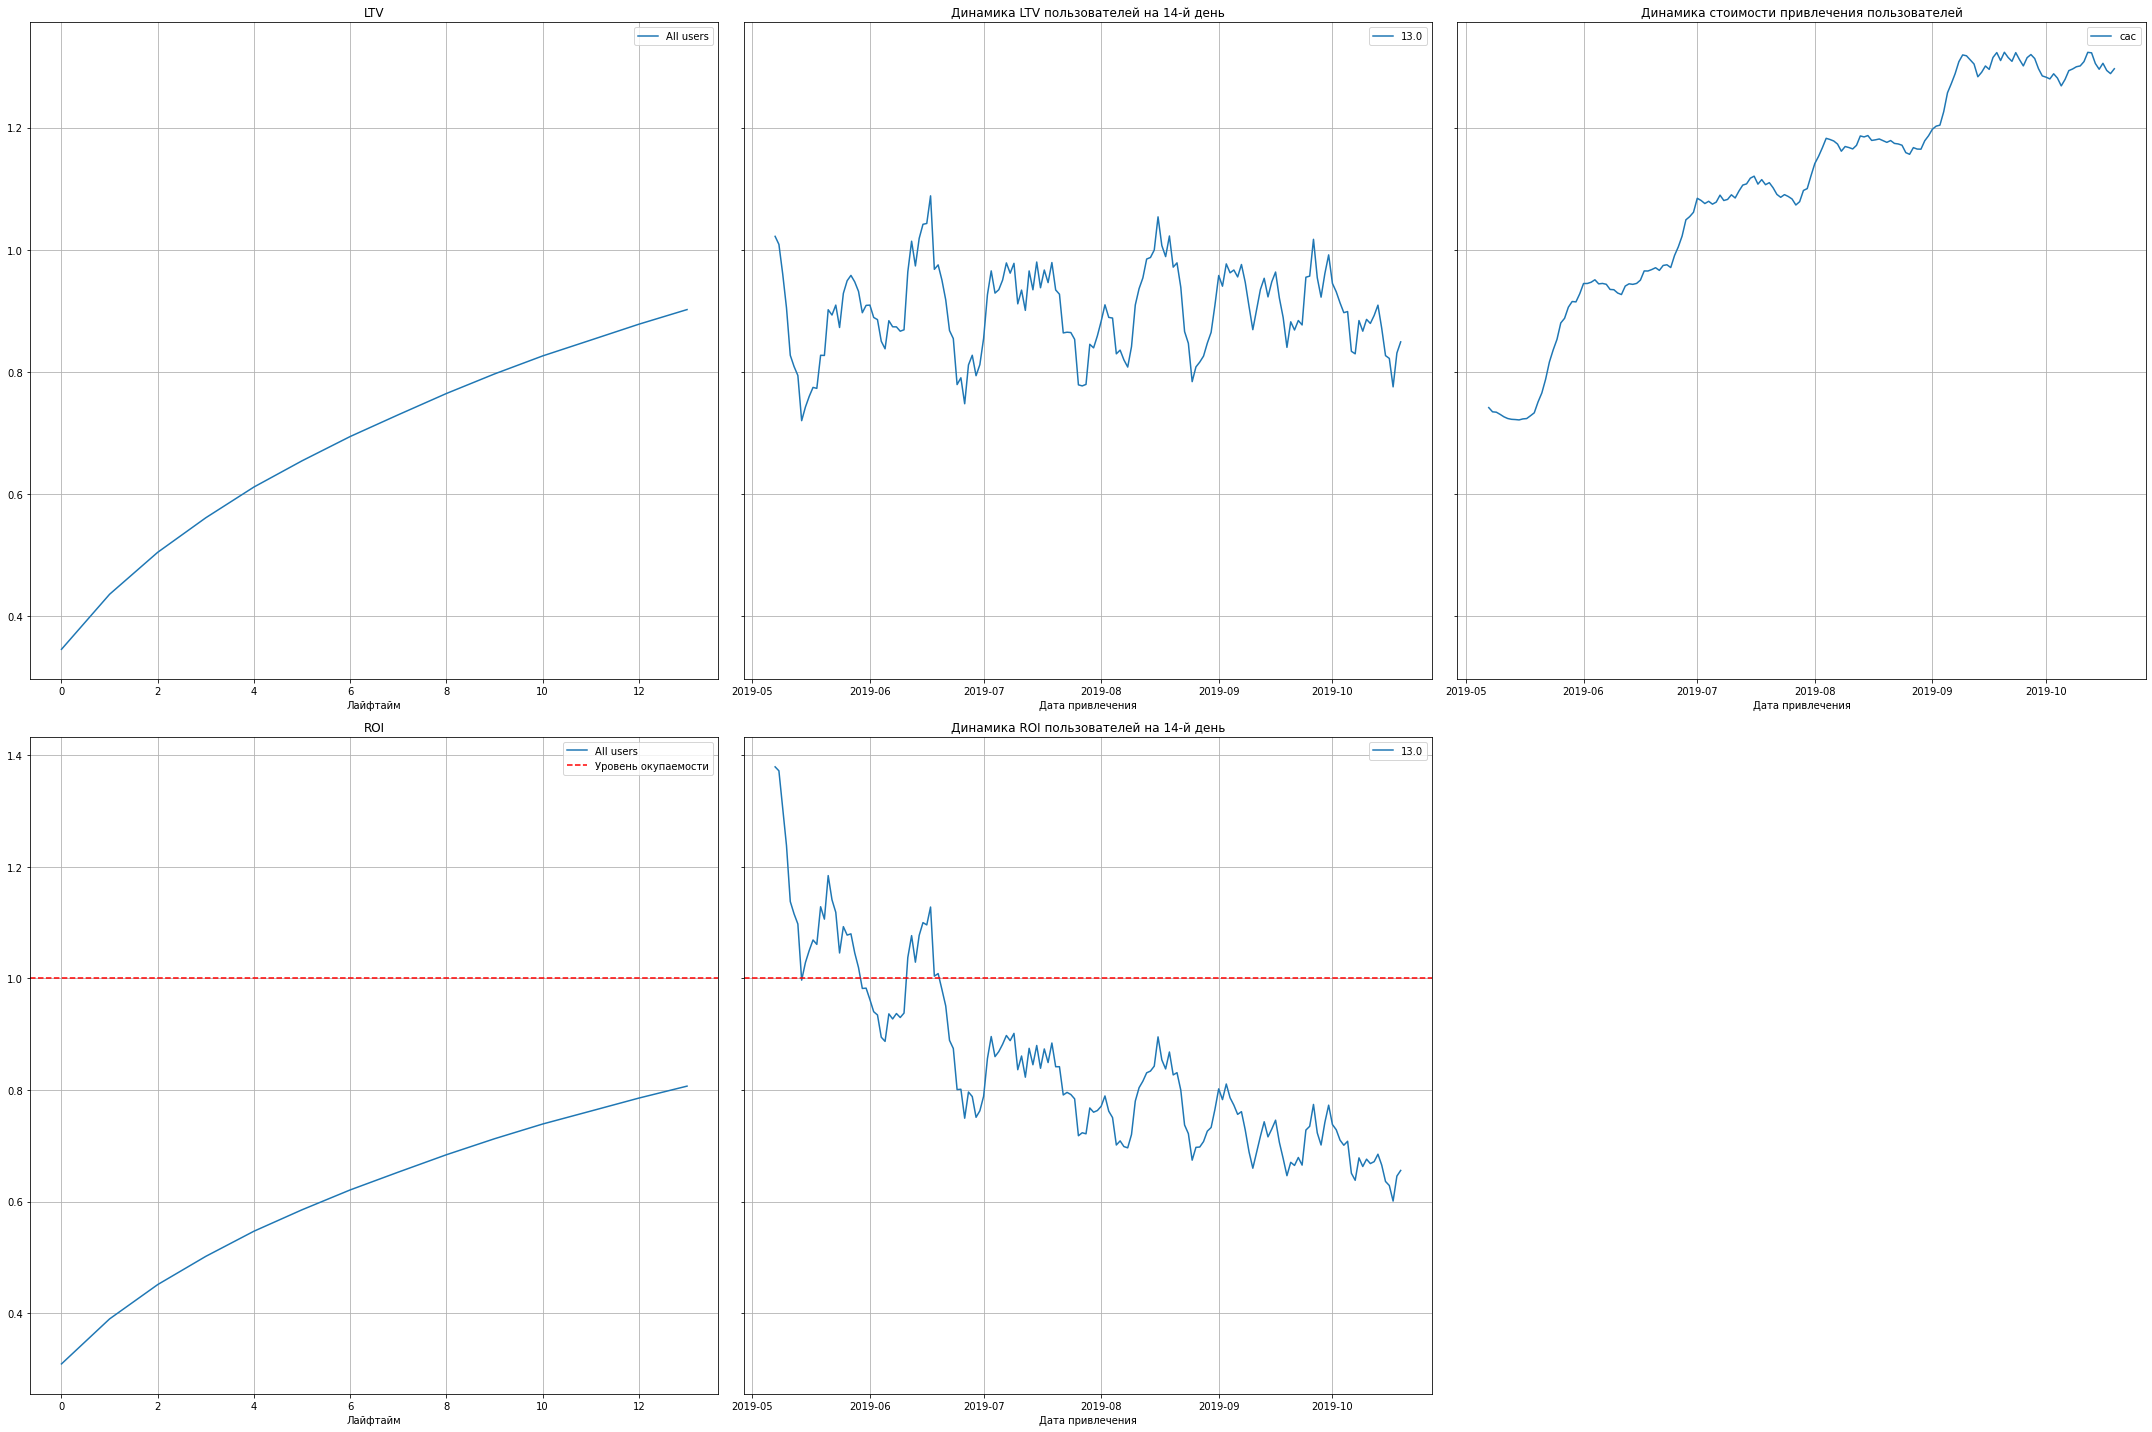

In [41]:
# считаем LTV и ROI
ltv_raw, ltv_grouped, ltv_history, roi_grouped, roi_history  = get_ltv(
    profiles,
    orders,
    observation_date,
    horizon_days,
    dimensions=[])

# строим графики
plot_ltv_roi(ltv_grouped, ltv_history, roi_grouped, roi_history, horizon_days) 

По графикам можно сделать такие выводы:
- Реклама не окупается. ROI в конце периода — чуть выше 80%.
- CAC нестабилен. Возможно, дело в увеличении рекламного бюджета на каналы с низкой эффективностью.
- LTV достаточно стабилен. Значит рост САС не связан с ухудшением качества пользователей.

### Окупаемость рекламы с разбивкой по устройствам

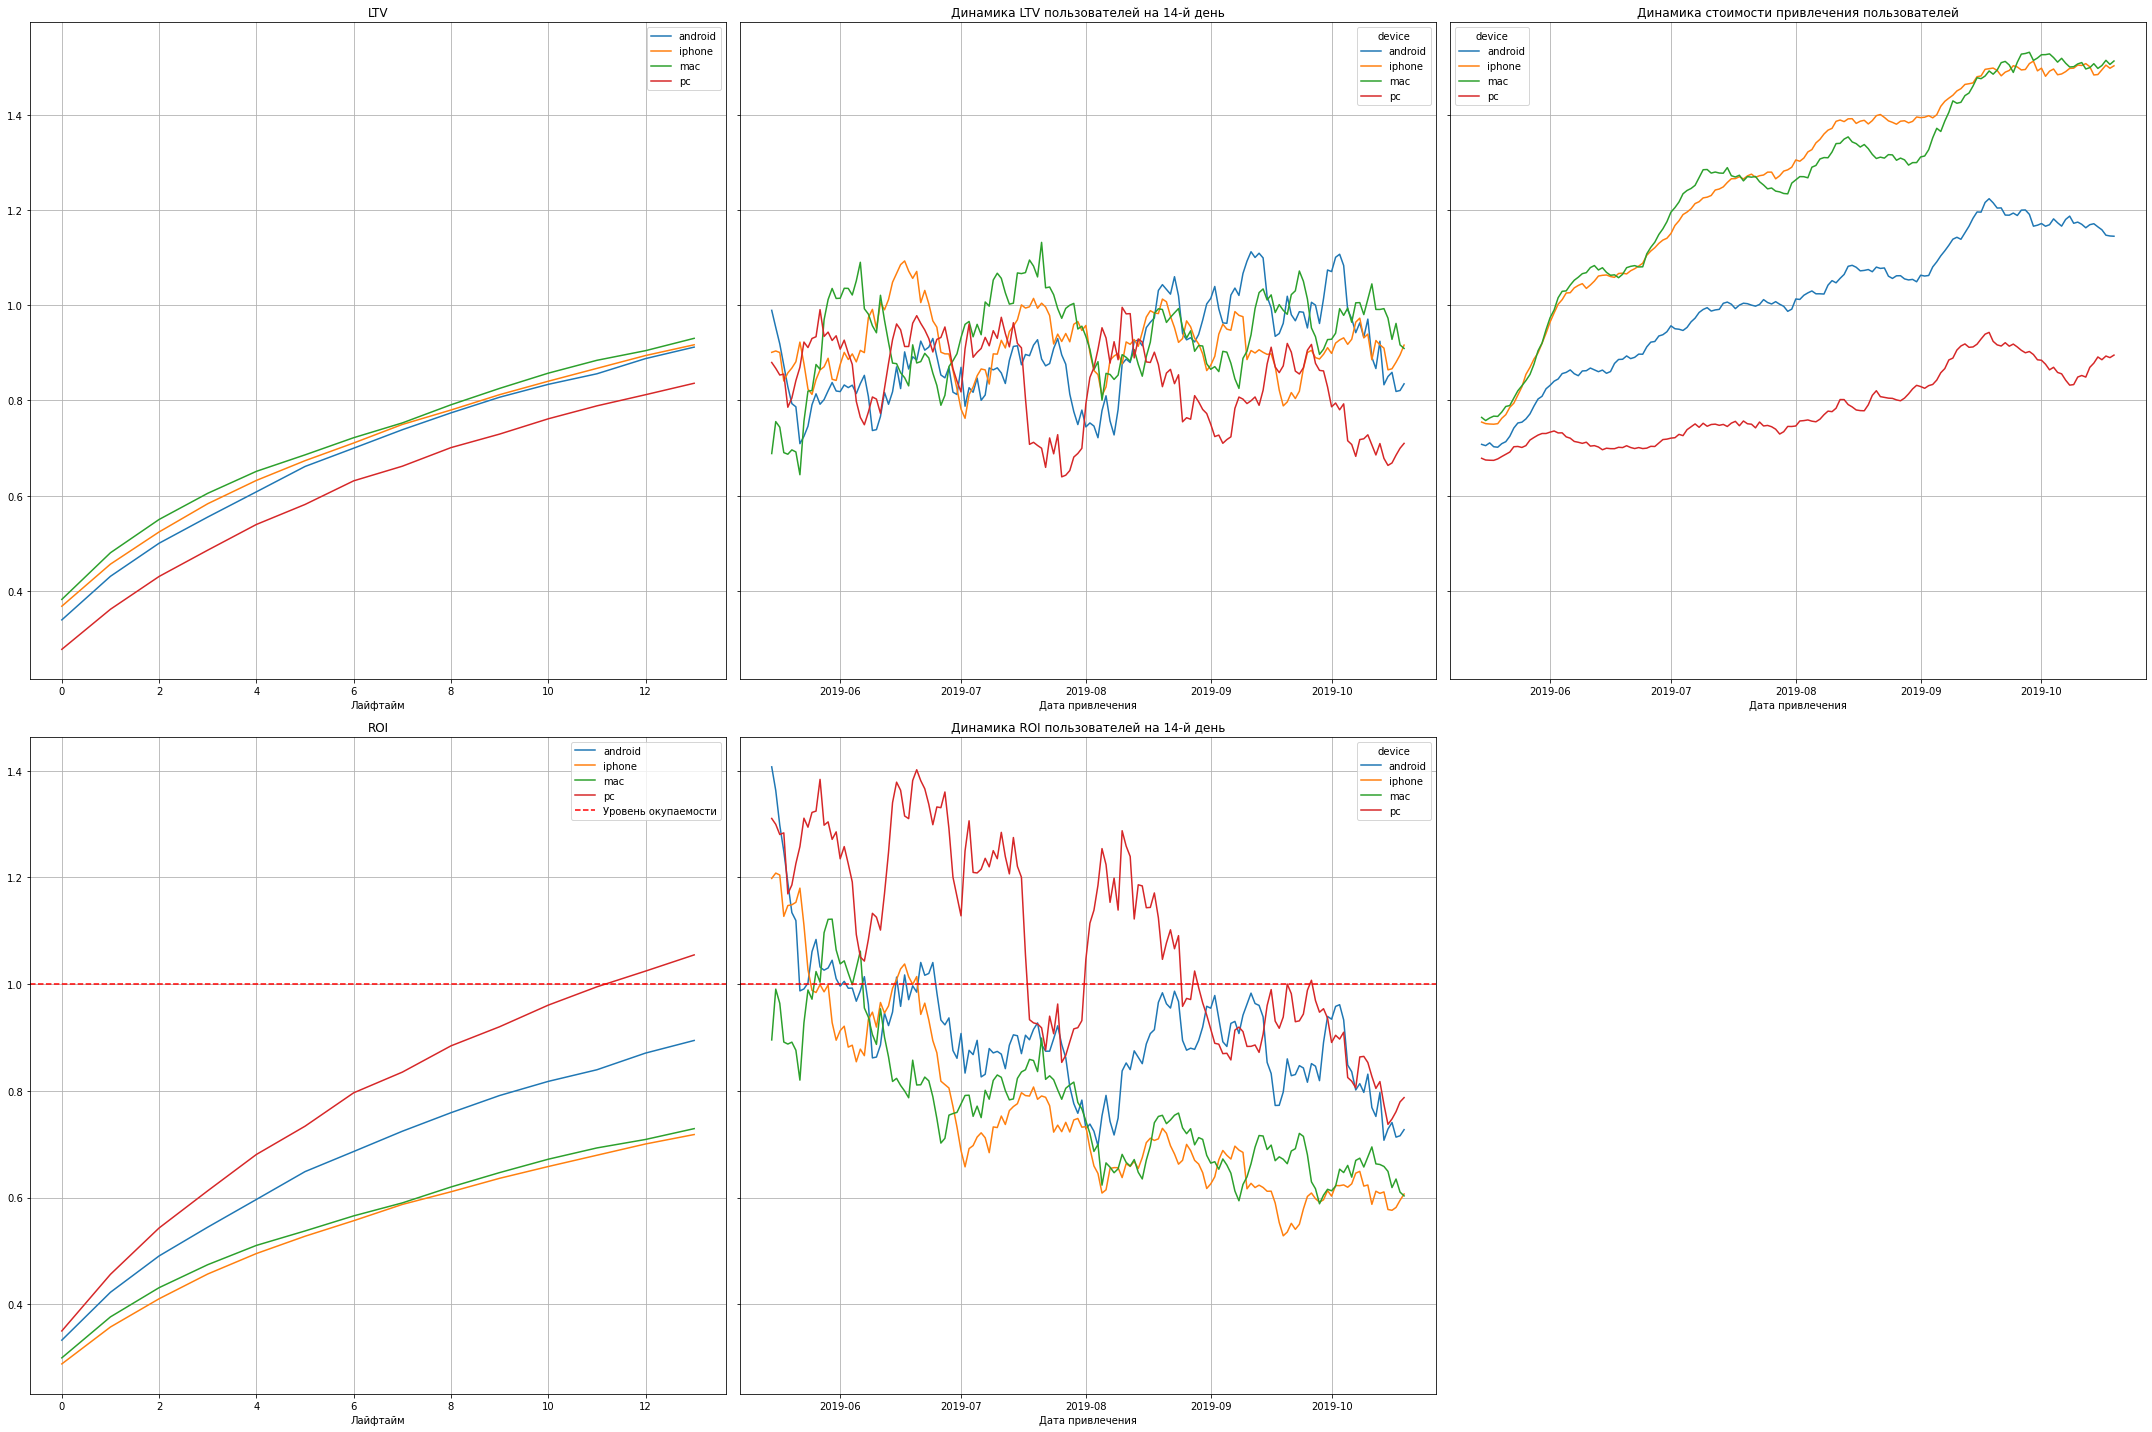

In [42]:
# считаем LTV и ROI
ltv_raw, ltv_grouped, ltv_history, roi_grouped, roi_history  = get_ltv(
    profiles,
    orders,
    observation_date,
    horizon_days,
    dimensions=['device'])

# строим графики
plot_ltv_roi(ltv_grouped, ltv_history, roi_grouped, roi_history, horizon_days, window = 15) 

Вот что говорят графики:
- Реклама окупается только на ПК
- Стоимость привлечения растет и максимален рост для пользователей мака и айфона.
- LTV стабилен. Снижается только у ПК
- ROI в динамике падает.

### Окупаемость рекламы с разбивкой по странам

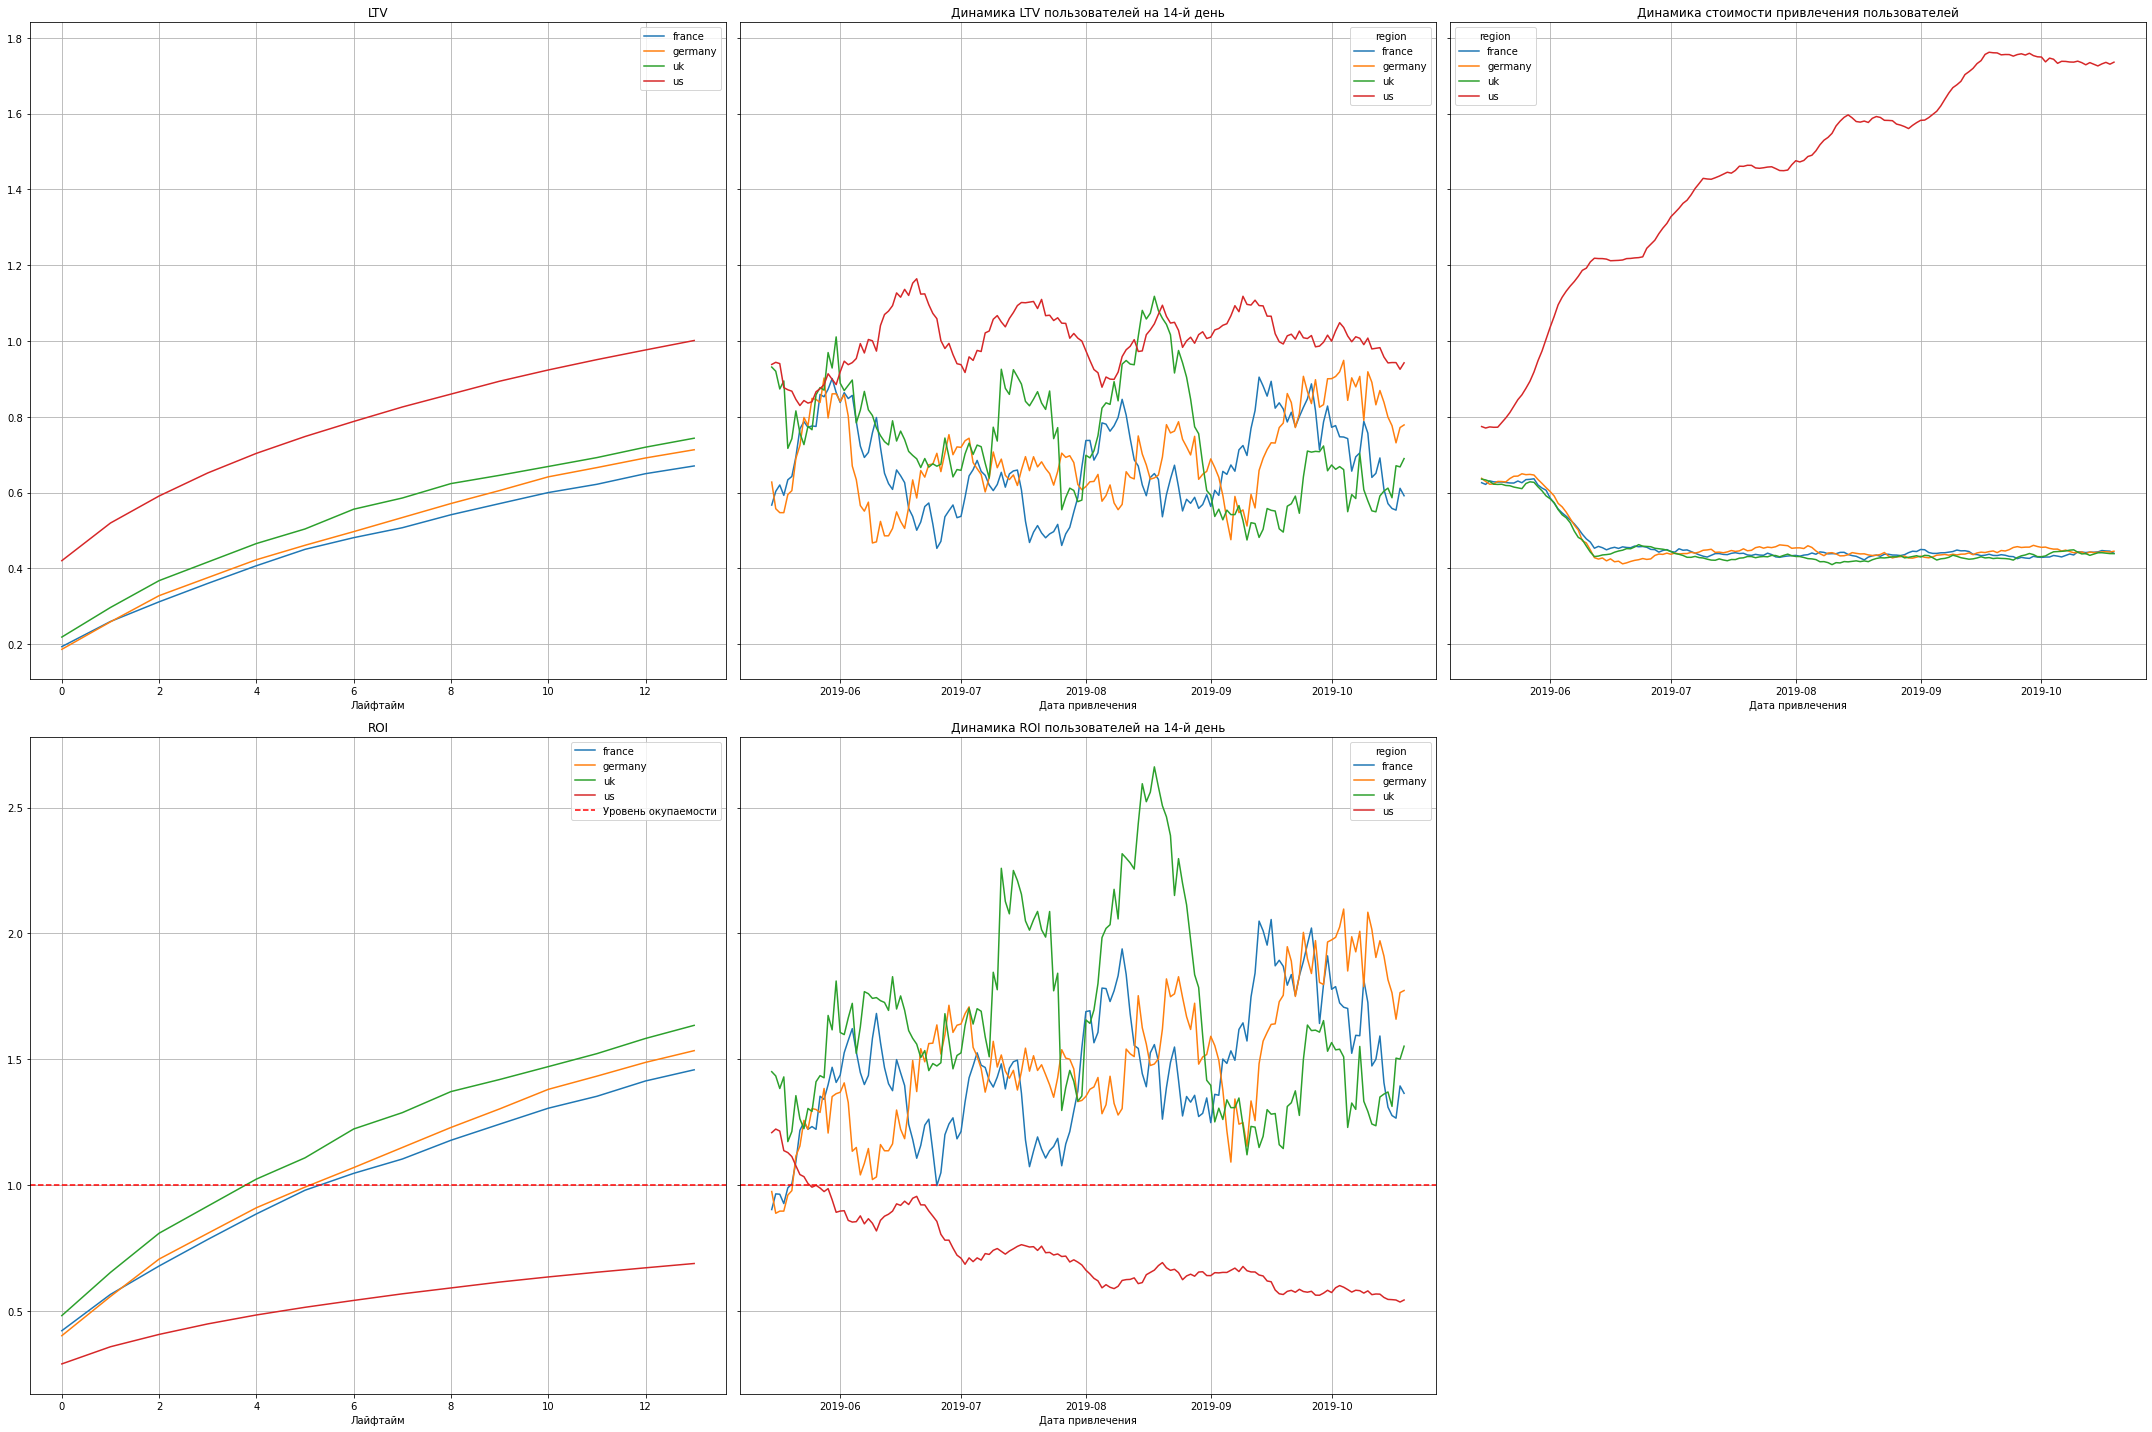

In [43]:
# считаем LTV и ROI
ltv_raw, ltv_grouped, ltv_history, roi_grouped, roi_history  = get_ltv(
    profiles,
    orders,
    observation_date,
    horizon_days,
    dimensions=['region'])

# строим графики
plot_ltv_roi(ltv_grouped, ltv_history, roi_grouped, roi_history, horizon_days, window = 15) 

Вот что говорят графики:
- Реклама не окупается только в Штатах.
- Стоимость привлечения растет только в Штатах.
- LTV стабилен и наибольший в Штатах.

### Окупаемость рекламы с разбивкой по рекламным каналам

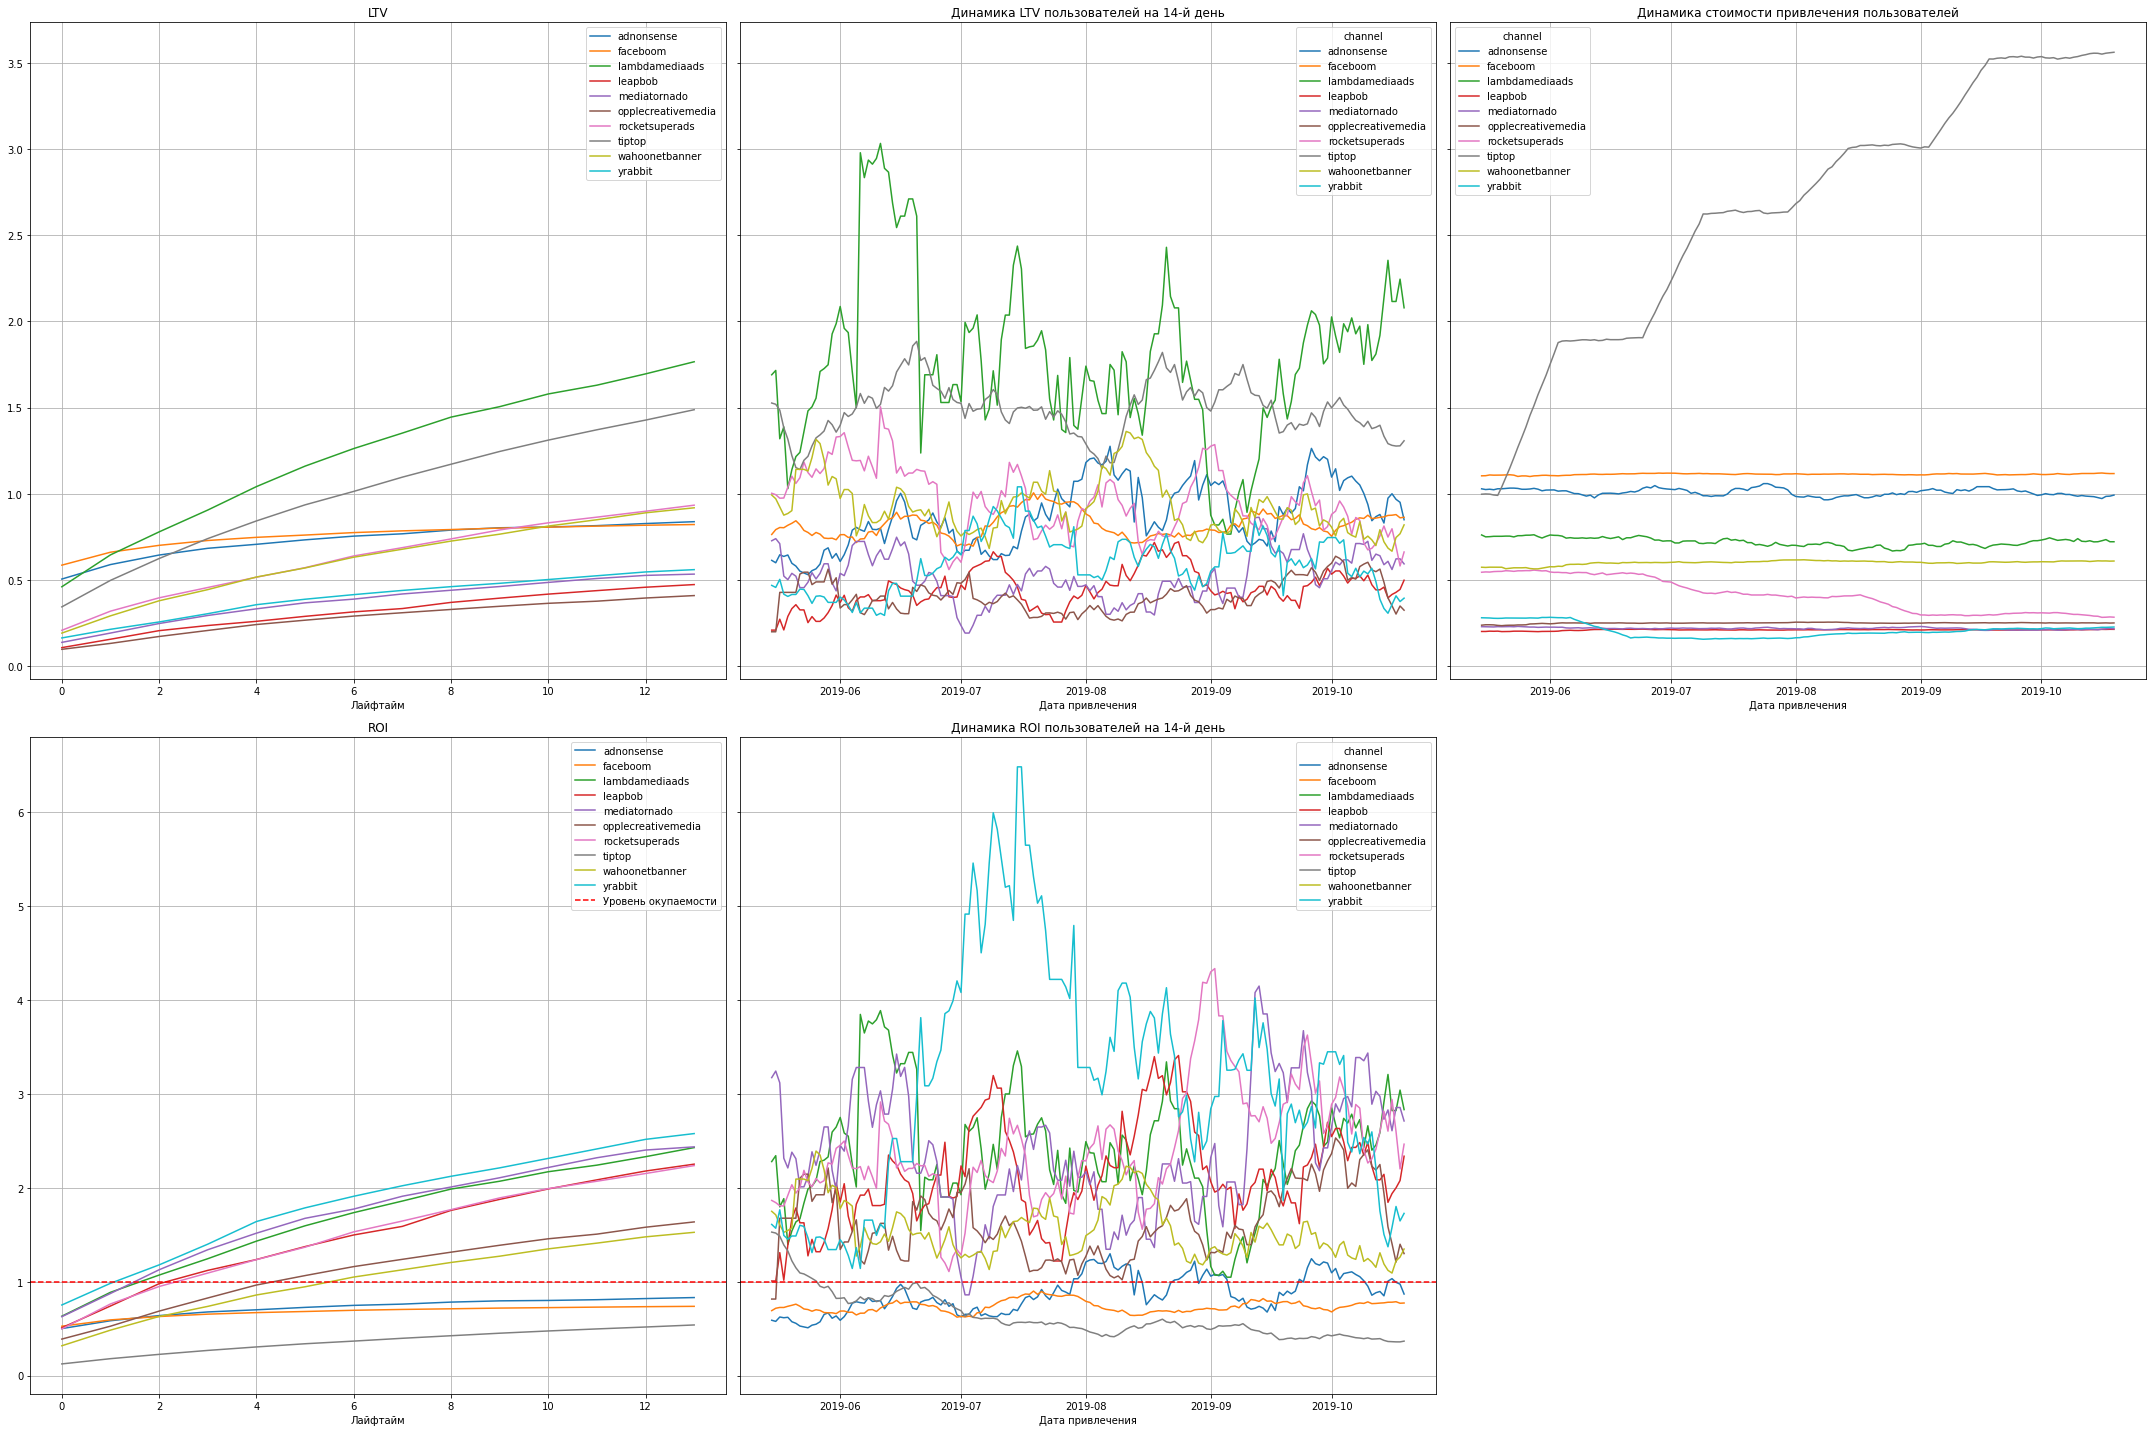

In [44]:
# считаем LTV и ROI
ltv_raw, ltv_grouped, ltv_history, roi_grouped, roi_history  = get_ltv(
    profiles,
    orders,
    observation_date,
    horizon_days,
    dimensions=['channel'])

# строим графики
plot_ltv_roi(ltv_grouped, ltv_history, roi_grouped, roi_history, horizon_days, window = 15) 

Вот что говорят графики:
- Реклама не окупается у типтопа, фейсбума и эднонсенса.
- Стоимость привлечения растет только в типтопе.
- LTV стабилен

### Конверся и удержание с разбивкой по устройствам, странам, рекламным каналам.

#### Конверсия с разбивкой по устройствам

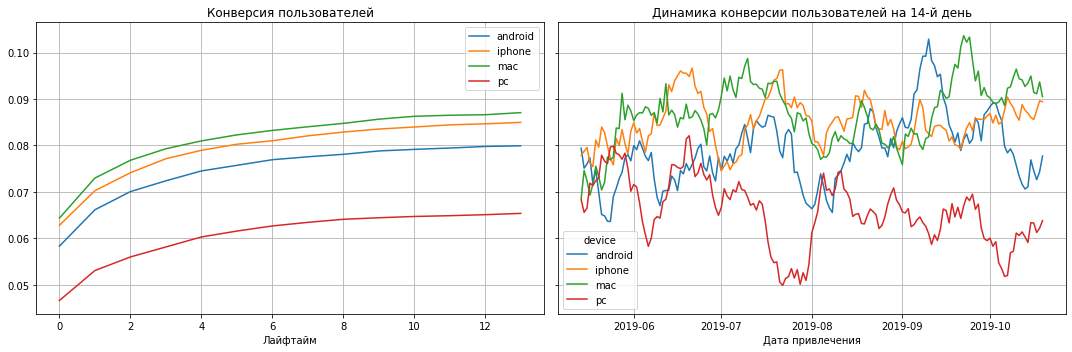

In [45]:
result_raw, result_grouped, result_in_time  = get_conversion(
    profiles,
    orders,
    observation_date,
    horizon_days,
    dimensions = ['device'])

plot_conversion(result_grouped, result_in_time, horizon_days, window = 14)

Видим, что ниже всего конверсия, только у пользователей ПК.

#### Конверсия с разбивкой по странам

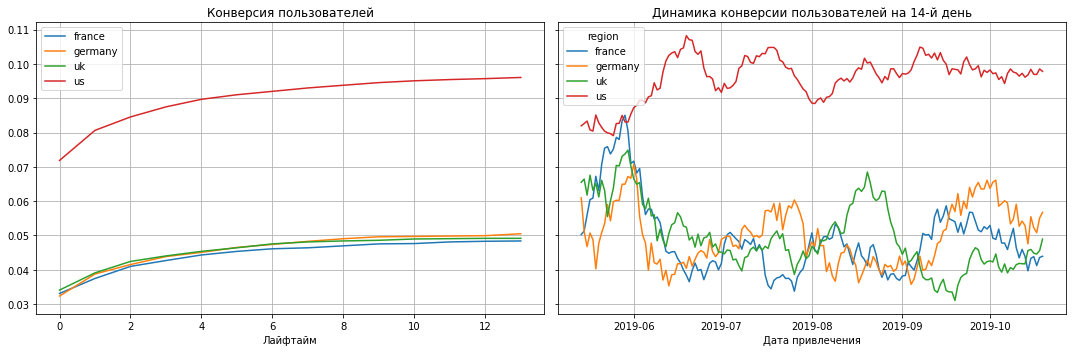

In [46]:
result_raw, result_grouped, result_in_time  = get_conversion(
    profiles,
    orders,
    observation_date,
    horizon_days,
    dimensions=['region'])
plot_conversion(result_grouped, result_in_time, horizon_days, window = 14)

Понятно, почему из штатов самые дорогие пользователи. У них самая высокая конверсия. Интересно, что у них с удержанием

#### Конверсия с разбивкой по рекламным каналам

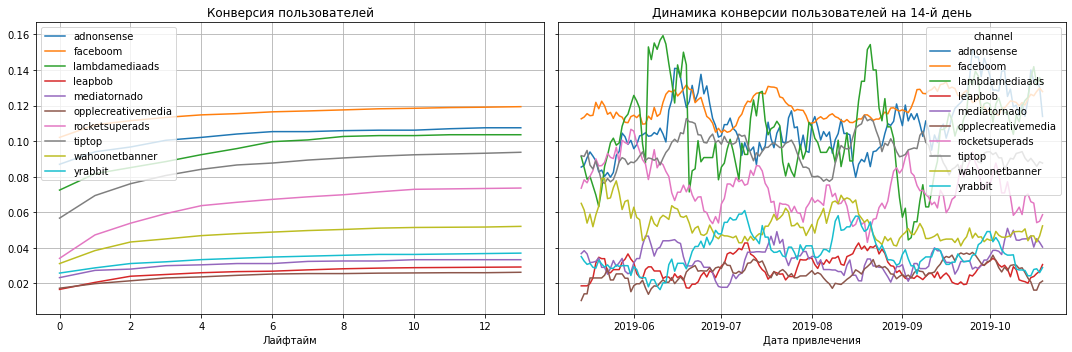

In [47]:
result_raw, result_grouped, result_in_time  = get_conversion(
    profiles,
    orders,
    observation_date,
    horizon_days,
    dimensions=['channel'])
plot_conversion(result_grouped, result_in_time, horizon_days, window = 14)

Типтоп, фейсбума и эднонсенс в топе по конверсии. Но кроме них там еще лямбдамедиаэдс.

#### Удержание с разбивкой по устройствам

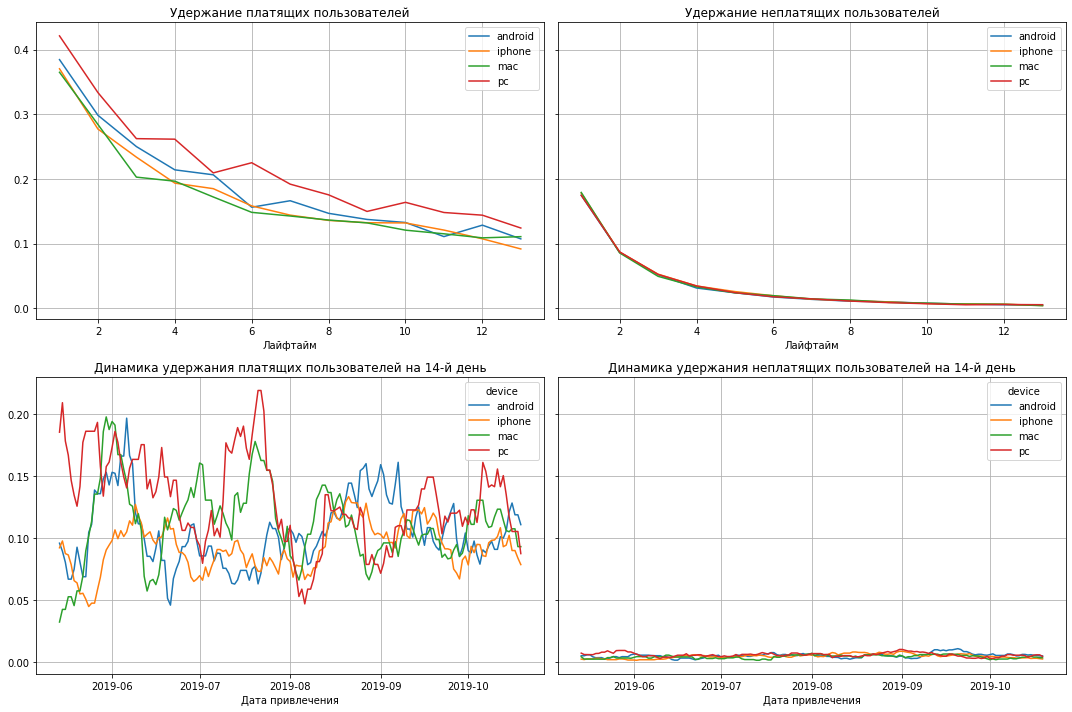

In [48]:
retention_raw, retention, retention_history  = get_retention(
    profiles,
    visits,
    observation_date,
    horizon_days,
    dimensions=['device'])
plot_retention(retention, retention_history, horizon_days, window = 14)

У всех платформ удержание на одном уровне.

#### Удержание с разбивкой по странам

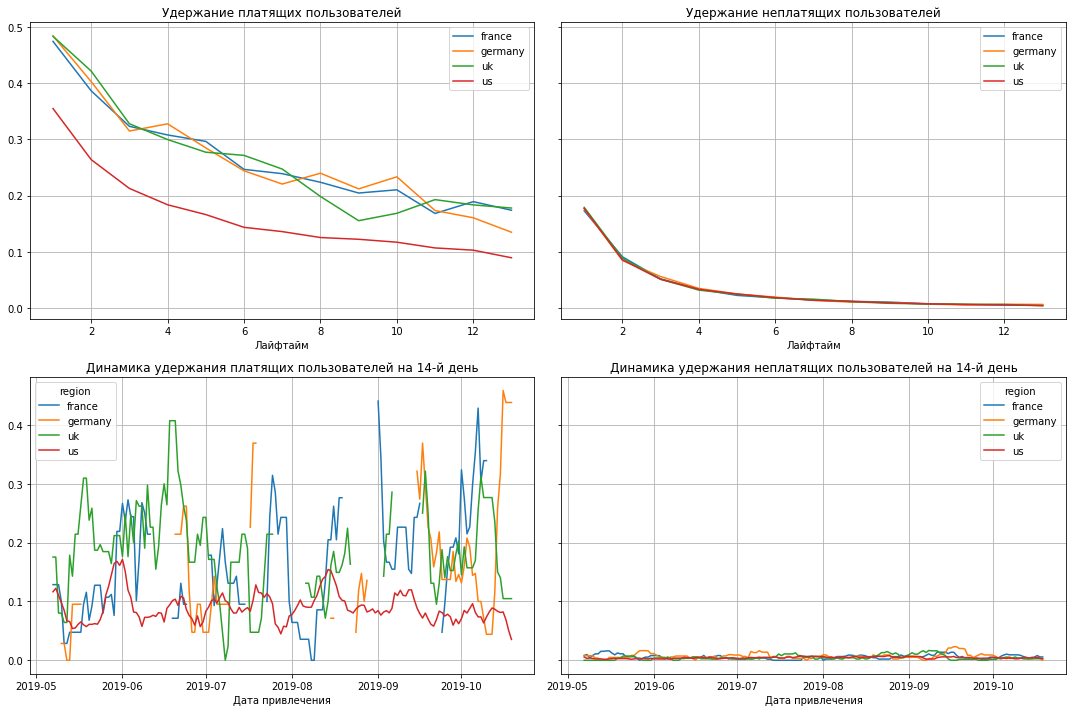

In [49]:
retention_raw, retention, retention_history  = get_retention(
    profiles,
    visits,
    observation_date,
    horizon_days,
    dimensions=['region'])
plot_retention(retention, retention_history, horizon_days)

Как я и предполагал. В штатах привлекается больше всего пользователей, но у держание этих пользователей хуже всех.

#### Удержание с разбивкой по рекламным каналам

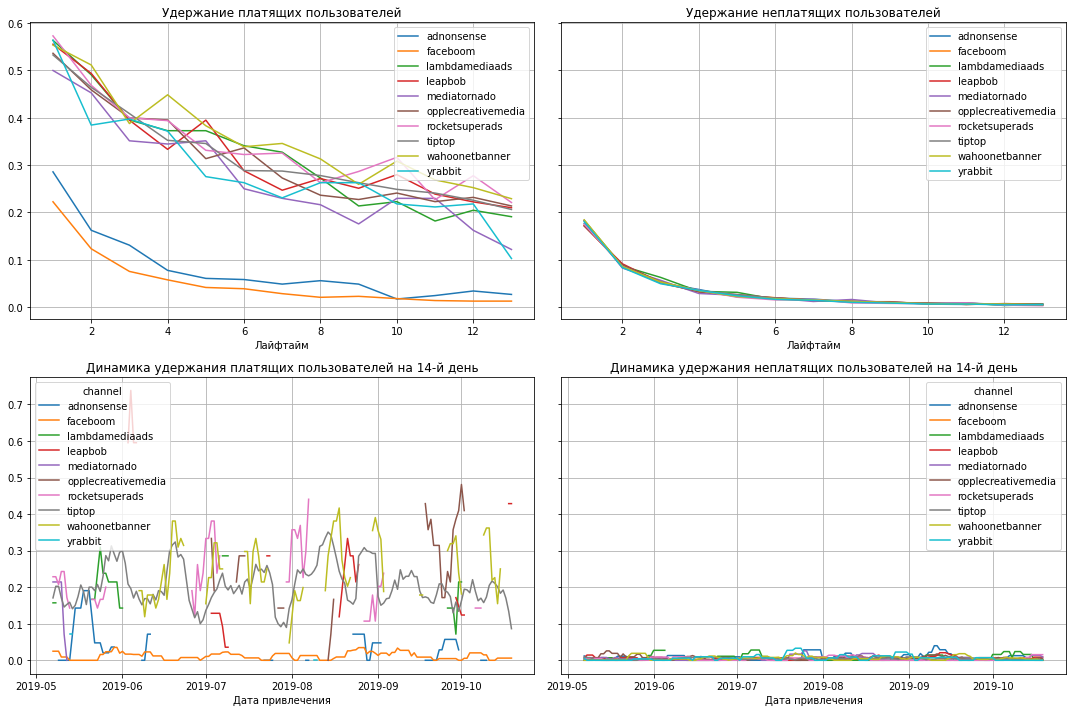

In [50]:
retention_raw, retention, retention_history  = get_retention(
    profiles,
    visits,
    observation_date,
    horizon_days,
    dimensions=['channel'])
plot_retention(retention, retention_history, horizon_days)

У фейсбума и эднонсенса удержание стремиться к нулю. Возможно там плохо настроенны целевые аудитории.

#### Рассмотрим рынок Штатов в разрезе по каналам привлечения

In [51]:
profiles = profiles.query('region == "us"') 
profiles

,user_id,first_ts,channel,device,region,dt,month,payer,acquisition_cost
0,599326,2019-05-07 20:58:57,faceboom,mac,us,2019-05-07,2019-05-01,True,1.088172
1,4919697,2019-07-09 12:46:07,faceboom,iphone,us,2019-07-09,2019-07-01,False,1.107237
4,31989216,2019-10-02 00:07:44,yrabbit,iphone,us,2019-10-02,2019-10-01,False,0.230769
8,58263264,2019-05-11 19:18:43,faceboom,iphone,us,2019-05-11,2019-05-01,False,1.128205
9,59835779,2019-05-11 21:13:47,mediatornado,iphone,us,2019-05-11,2019-05-01,False,0.250435
...,...,...,...,...,...,...,...,...,...
149999,999942424543,2019-05-24 21:03:26,tiptop,iphone,us,2019-05-24,2019-05-01,False,1.900000
150001,999949280903,2019-08-12 06:47:27,faceboom,mac,us,2019-08-12,2019-08-01,False,1.117838
150003,999956196527,2019-09-28 08:33:02,tiptop,iphone,us,2019-09-28,2019-09-01,False,3.500000
150005,999976332130,2019-07-23 02:57:06,tiptop,iphone,us,2019-07-23,2019-07-01,False,2.600000


In [52]:
profiles.groupby('channel').agg({'user_id' : 'count'}).sort_values('user_id', ascending = False)

,user_id
channel,
faceboom,29144
tiptop,19561
rocketsuperads,4448
mediatornado,4364
yrabbit,4312


Видим, что основную часть рекламы в Штатах мы закупаем на фейсбуме и типтопе.

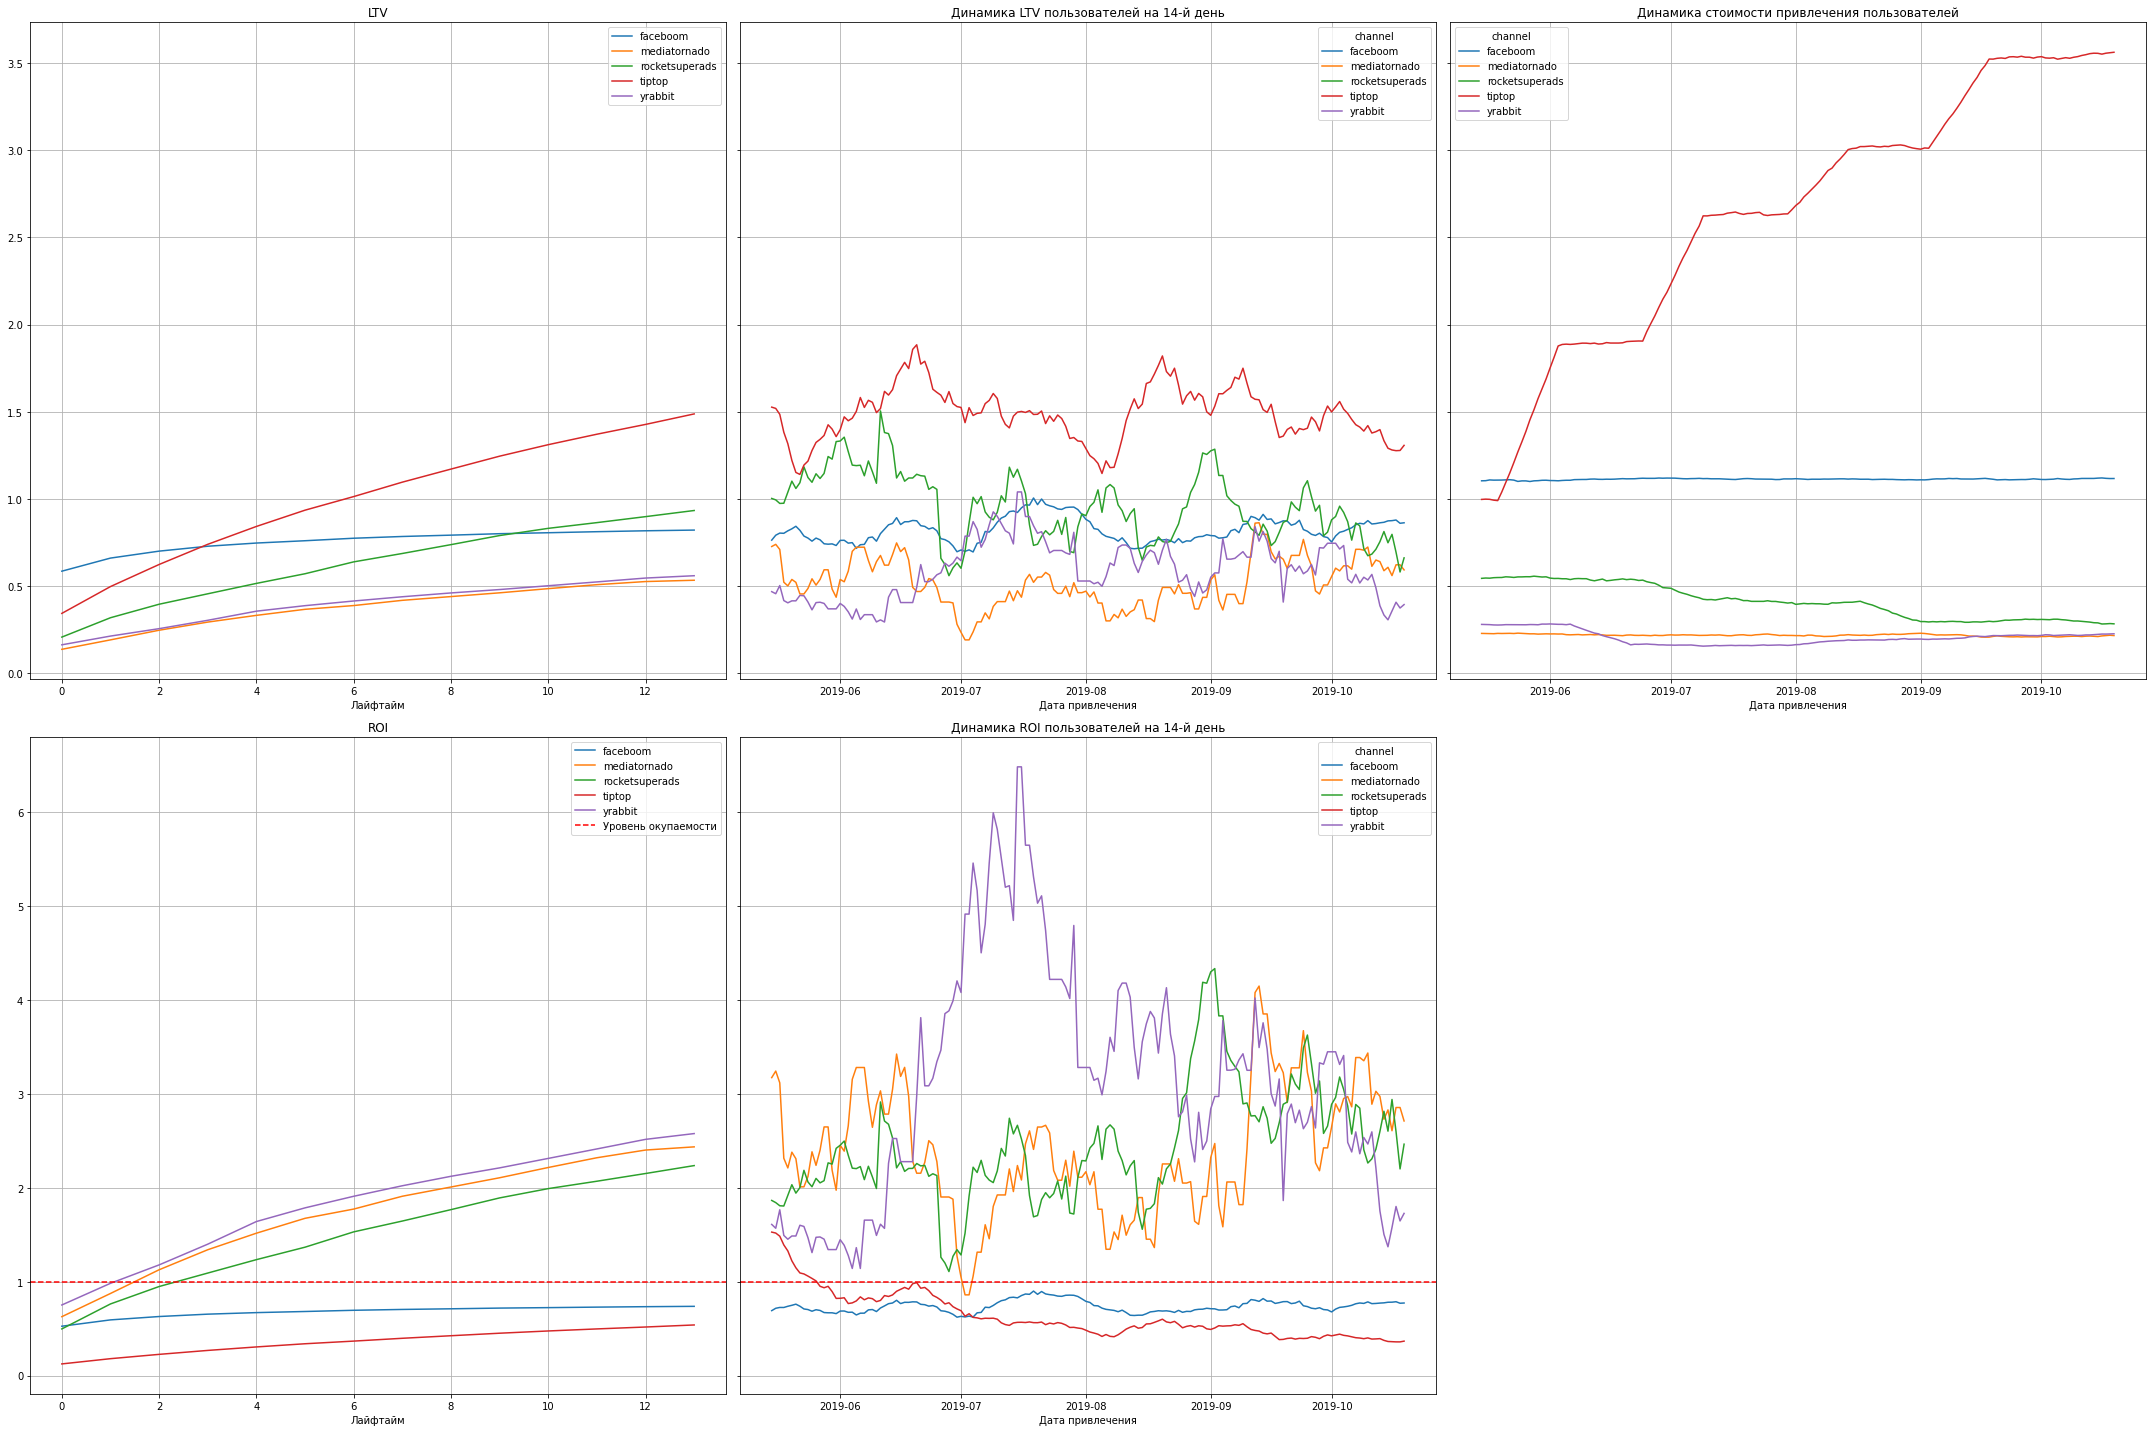

In [53]:
# считаем LTV и ROI
ltv_raw, ltv_grouped, ltv_history, roi_grouped, roi_history  = get_ltv(
    profiles,
    orders,
    observation_date,
    horizon_days,
    dimensions=['channel'])

# строим графики
plot_ltv_roi(ltv_grouped, ltv_history, roi_grouped, roi_history, horizon_days, window = 15) 

И сразу видно, что фейсбум и типтоп не окупают себя. У типтопа слишком высокая цена привлечения при высоком LTV. Фейсбум же имеет средний LTV и цену выше среднего.

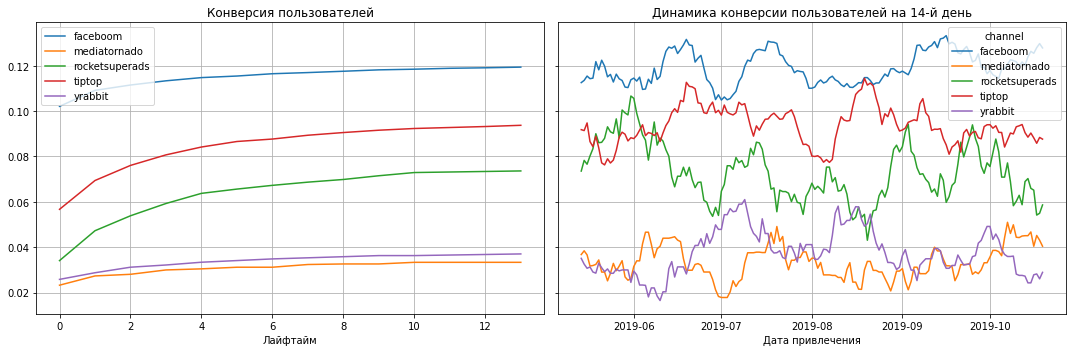

In [54]:
result_raw, result_grouped, result_in_time  = get_conversion(
    profiles,
    orders,
    observation_date,
    horizon_days,
    dimensions=['channel'])
plot_conversion(result_grouped, result_in_time, horizon_days, window = 14)

Конверсия фейсбума самая высокая, после него идет типтоп.

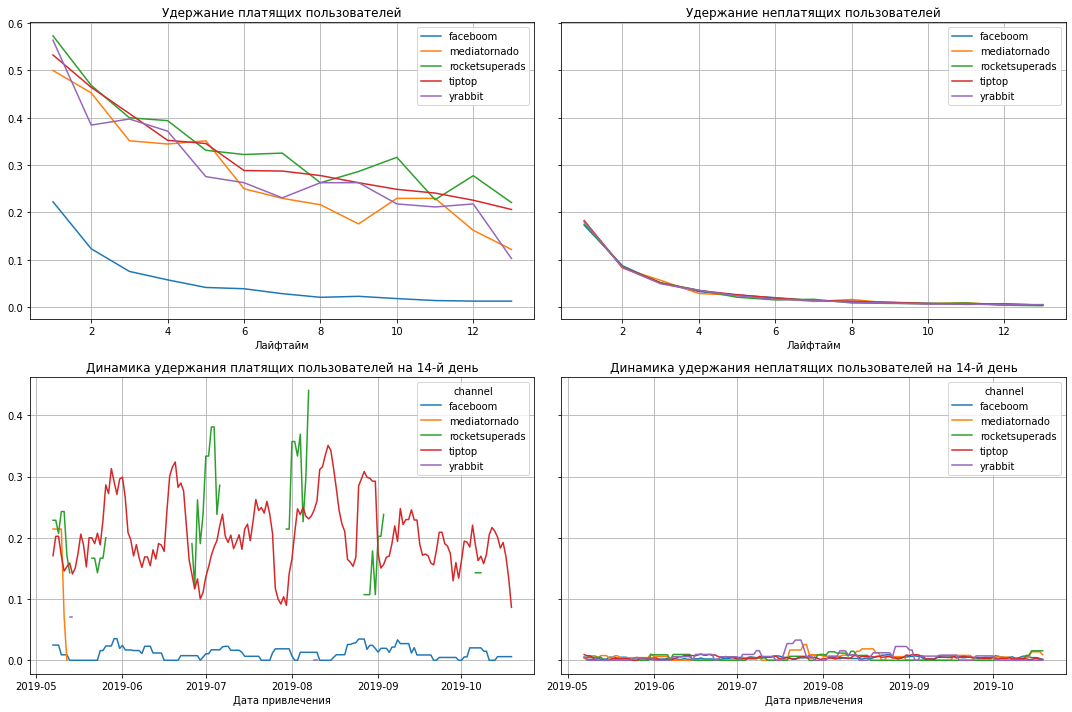

In [55]:
retention_raw, retention, retention_history  = get_retention(
    profiles,
    visits,
    observation_date,
    horizon_days,
    dimensions=['channel'])
plot_retention(retention, retention_history, horizon_days)

у Фейсбума удержание стермится к 0, когда типтоп показывает средние результаты.

### Вывод
- Реклама не окупает себя, РОИ не доходит до 1.
- Среди платформ только реклама на ПК смогла себя окупить. Остальные не смогли
- Среди стран хуже всего показали себя Соединенные Штаты, у которых стоимость привлечения больше почти в три раза чем у остальных стран. И низкий уровень удержания пользователей
- Среди платформ хуже всег себя показывает фейсбум и эднонсенс с высокой стоимостью привлечения и низким удержанием пользователей.

Думаю, что Штаты, фейсбум и эднонсенс максимально влияют на окупаемость рекламы в общем

## Выводы
- Выделите причины неэффективности привлечения пользователей;
- Сформируйте рекомендации для отдела маркетинга для повышения эффективности.

Я бы выделил главной причиной неокупаемости рекламы это использование площадок фейсбум и эднонсенс с высокой ценой за пользователя и низким удержанием. 
- Рекомендация: увеличить бюджет и охваты рекламы через каналы лямбдамедиаэдс и рокетсуперэдс. Т.к их показатели САС одни из самых низких, я уровень конверсии и удержания у них один из лучших.

- Отдельно можно рассмотерть рынок соединенных штатов. Т.к. там только два канала не дают окупаться целову региону. Это фейсбум и типтоп.